# CREDIT EDA CASE STUDY

### Problem statement :

#### The bank provides customer's information such as age, education, income, job-type, loan-type, clients who has payment difficulties, previous application status and so on. In order to increase its overall revenue, bank cunducts various marketing campaigns such as credit card, term deposit, loan etc. These campiagns need to be cost-efficient so that the bank not only increase their overall revenues but also total profit. So I am going to apply my EDA knowledge on the given dataset to analyse the pattern and provide recommendation for upcoming loan campiagn.
#### In this case study I am going to identify pattern which indicate if client has any difficulty in paying their installments. So bank can reduce its Non-Perrforming-Asset by approving loan to appropriate customer.

### Imorting the libraries and warnings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

## 1. DATA UNDERSTANDING WITH DATA CLEANING AND MANIPULATION :

### Reading application_data_file from .csv file 

In [641]:
# application_data =  contains all information at the time of application
application_data = pd.read_csv("C:\\Users\\sony\\Downloads\\application_data.csv")
pd.set_option("display.max_columns", None)
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [642]:
# Print shape of application_data
application_data.shape

(307511, 122)

In [643]:
# Print info of application_data
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### Identifying missing values and dealing with them :

In [644]:
# Finding missing values in given data
application_data.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [645]:
# Missing values in percentage.
application_data.isna().sum()*100/application_data.shape[0]

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [646]:
# Finding all missing value columns.
for i in application_data:
    if application_data[i].isna().sum()>0:
        a = application_data[i].isna().sum()
        print(i ," has",a, "na values")

AMT_ANNUITY  has 12 na values
AMT_GOODS_PRICE  has 278 na values
NAME_TYPE_SUITE  has 1292 na values
OWN_CAR_AGE  has 202929 na values
OCCUPATION_TYPE  has 96391 na values
CNT_FAM_MEMBERS  has 2 na values
EXT_SOURCE_1  has 173378 na values
EXT_SOURCE_2  has 660 na values
EXT_SOURCE_3  has 60965 na values
APARTMENTS_AVG  has 156061 na values
BASEMENTAREA_AVG  has 179943 na values
YEARS_BEGINEXPLUATATION_AVG  has 150007 na values
YEARS_BUILD_AVG  has 204488 na values
COMMONAREA_AVG  has 214865 na values
ELEVATORS_AVG  has 163891 na values
ENTRANCES_AVG  has 154828 na values
FLOORSMAX_AVG  has 153020 na values
FLOORSMIN_AVG  has 208642 na values
LANDAREA_AVG  has 182590 na values
LIVINGAPARTMENTS_AVG  has 210199 na values
LIVINGAREA_AVG  has 154350 na values
NONLIVINGAPARTMENTS_AVG  has 213514 na values
NONLIVINGAREA_AVG  has 169682 na values
APARTMENTS_MODE  has 156061 na values
BASEMENTAREA_MODE  has 179943 na values
YEARS_BEGINEXPLUATATION_MODE  has 150007 na values
YEARS_BUILD_MODE  h

In [647]:
# Finding number of columns with more than 40% na values
(application_data.isna().sum()*100/application_data.shape[0] > 40).sum()

49

#### From above information we can say that 49 of columns contain missing values which are more than 40% . So in cleaning process we can drop such columns.
#### And for other columns we can fill na value on the basis of mean, median, mode or random selaction.
#### If count of na values is negligible then we can drop such rows. 

In [648]:
# Finding name of columns which have na values less than 40%
application_data0 = []     # Create empty set
for i in application_data:
    if application_data[i].isna().sum()*100/application_data.shape[0]<40:
        application_data0.append(i)
        #print(i)
print(application_data0)        



['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FL

In [649]:
# Dropping columns which have na values more than 40%.
application_data1 = application_data[application_data0] # New data without 49 columns which have less na values
application_data1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [650]:
# Dropping unnecessary columns and taking only informative columns so we can focus on conclusive variables
application_data1 = application_data1[["SK_ID_CURR","TARGET","NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","REGION_POPULATION_RELATIVE","DAYS_BIRTH","DAYS_EMPLOYED","OCCUPATION_TYPE","CNT_FAM_MEMBERS","REGION_RATING_CLIENT_W_CITY","ORGANIZATION_TYPE","DAYS_REGISTRATION","DAYS_ID_PUBLISH","FLAG_DOCUMENT_4","FLAG_DOCUMENT_10","FLAG_DOCUMENT_12"]]

In [651]:
application_data1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_DOCUMENT_4,FLAG_DOCUMENT_10,FLAG_DOCUMENT_12
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,Laborers,1.0,2,Business Entity Type 3,-3648.0,-2120,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,Core staff,2.0,1,School,-1186.0,-291,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,Laborers,1.0,2,Government,-4260.0,-2531,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,Laborers,2.0,2,Business Entity Type 3,-9833.0,-2437,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,Core staff,1.0,2,Religion,-4311.0,-3458,0,0,0


In [652]:
# shape of new application_data1
application_data1.shape

(307511, 27)

In [653]:
# Now checking Na values again
application_data1.isna().sum()  # AMT_ANNUITY has 12 na values, AMT_GOODS_PRICE has 278 na values
                            # OCCUPATION_TYPE has 96391 na values, CNT_FAM_MEMBERS has 2 na values.                     

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT_W_CITY        0
ORGANIZATION_TYPE                  0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_DOCUMENT_4                    0
FLAG_DOCUMENT_10                   0
FLAG_DOCUMENT_12                   0
d

In [654]:
# Finding percentage of na values
application_data1.isna().sum()*100/application_data.shape[0]

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT_W_CITY     0.000000
ORGANIZATION_TYPE               0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_DOCUMENT_4 

#### Percentage of na values in AMT_ANNUITY, AMT_GOODS_PRICE, CNT_FAM_MEMBERS are negligible so we can drop such rows.
#### We can change  na values in OCCUPATION_TYPE  by using  MODE.

In [655]:
# Dropping rows wich has minimum na values.
application_data1 = application_data1[~application_data1.AMT_ANNUITY.isna()]
application_data1 = application_data1[~application_data1.AMT_GOODS_PRICE.isna()]
application_data1 = application_data1[~application_data1.CNT_FAM_MEMBERS.isna()]
application_data1.isna().sum()


SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
OCCUPATION_TYPE                96334
CNT_FAM_MEMBERS                    0
REGION_RATING_CLIENT_W_CITY        0
ORGANIZATION_TYPE                  0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_DOCUMENT_4                    0
FLAG_DOCUMENT_10                   0
FLAG_DOCUMENT_12                   0
d

In [656]:
# Finding mode of OCCUPATION_TYPE column to replace na values.
print(application_data1.OCCUPATION_TYPE.mode())
application_data1.OCCUPATION_TYPE.value_counts()

0    Laborers
Name: OCCUPATION_TYPE, dtype: object


Laborers                 55132
Sales staff              32063
Core staff               27530
Managers                 21347
Drivers                  18589
High skill tech staff    11370
Accountants               9801
Medicine staff            8527
Security staff            6712
Cooking staff             5939
Cleaning staff            4648
Private service staff     2648
Low-skill Laborers        2092
Waiters/barmen staff      1346
Secretaries               1304
Realty agents              751
HR staff                   563
IT staff                   525
Name: OCCUPATION_TYPE, dtype: int64

In [657]:
# Replacing na values of OCCUPATION_TYPE by using MODE
application_data1.OCCUPATION_TYPE.fillna("Laborers",inplace=True)

In [658]:
# Application_data1 without na values.
application_data1.isna().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT_W_CITY    0
ORGANIZATION_TYPE              0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_10               0
FLAG_DOCUMENT_12               0
dtype: int64

### Identifying data-type of columns and changing them correctly 


In [659]:
# finding data shape and data information
print(application_data1.shape)
application_data1.info(verbose=True)

(307221, 27)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 307221 entries, 0 to 307510
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307221 non-null  int64  
 1   TARGET                       307221 non-null  int64  
 2   NAME_CONTRACT_TYPE           307221 non-null  object 
 3   CODE_GENDER                  307221 non-null  object 
 4   FLAG_OWN_CAR                 307221 non-null  object 
 5   FLAG_OWN_REALTY              307221 non-null  object 
 6   CNT_CHILDREN                 307221 non-null  int64  
 7   AMT_INCOME_TOTAL             307221 non-null  float64
 8   AMT_CREDIT                   307221 non-null  float64
 9   AMT_ANNUITY                  307221 non-null  float64
 10  AMT_GOODS_PRICE              307221 non-null  float64
 11  NAME_INCOME_TYPE             307221 non-null  object 
 12  NAME_EDUCATION_TYPE          307221 non-null 

#### SK_ID_CURR is id-number of customer. So we have to change data type from INT to STR(object).
#### CNT_FAM_MEMBERS is INT data type but it is in the form of FLOAT type. So we have to change it into INT data type.
#### DAYS_REGISTRATION is INT data type but it is in the form of FLOAT. So we have to change it into INT data type.

In [660]:
# Changing data type of ID and Family members columns
application_data1.SK_ID_CURR = application_data1.SK_ID_CURR.astype(str)
application_data1.CNT_FAM_MEMBERS = application_data1.CNT_FAM_MEMBERS.astype(int)
application_data1.DAYS_REGISTRATION = application_data1.DAYS_REGISTRATION.astype(int)
application_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307221 entries, 0 to 307510
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307221 non-null  object 
 1   TARGET                       307221 non-null  int64  
 2   NAME_CONTRACT_TYPE           307221 non-null  object 
 3   CODE_GENDER                  307221 non-null  object 
 4   FLAG_OWN_CAR                 307221 non-null  object 
 5   FLAG_OWN_REALTY              307221 non-null  object 
 6   CNT_CHILDREN                 307221 non-null  int64  
 7   AMT_INCOME_TOTAL             307221 non-null  float64
 8   AMT_CREDIT                   307221 non-null  float64
 9   AMT_ANNUITY                  307221 non-null  float64
 10  AMT_GOODS_PRICE              307221 non-null  float64
 11  NAME_INCOME_TYPE             307221 non-null  object 
 12  NAME_EDUCATION_TYPE          307221 non-null  object 
 13 

In [661]:
# Checking values in CODE_GENDER column
application_data1.CODE_GENDER.value_counts()

F      202251
M      104966
XNA         4
Name: CODE_GENDER, dtype: int64

In [662]:
# Replace XNA with mode category that is F
application_data1.CODE_GENDER.replace("XNA" , "F",inplace=True )

### Handling outliers and manipulating accordingly

In [663]:
# Handling CNT_CHILDREN column 
# Describe CNT_CHILDREN column
application_data1.CNT_CHILDREN.describe()

count    307221.000000
mean          0.416977
std           0.722047
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

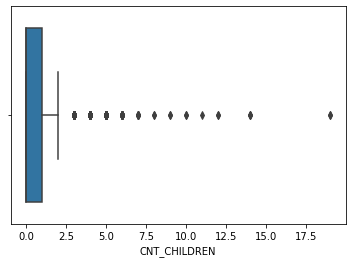

In [664]:
# Plot boxplot
sns.boxplot(application_data1.CNT_CHILDREN)
plt.show()

#### Client with more than 5 children is not generic in nature. So we can drop such rows. 

In [665]:
# dropping rows which more than 5 child
application_data1 = application_data1[~(application_data1.CNT_CHILDREN > 5)]

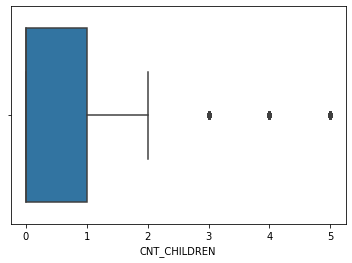

In [666]:
# Plot boxplot again
sns.boxplot(application_data1.CNT_CHILDREN)
plt.show()

#### From above boxplot we can say that about 75% population has either one child or no child.

In [667]:
# Handling AMT_INCOME_TOTAL column
# Describe AMT_INCOME_TOTAL column
application_data1.AMT_INCOME_TOTAL.describe()

count    3.071790e+05
mean     1.688354e+05
std      2.372345e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.485000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

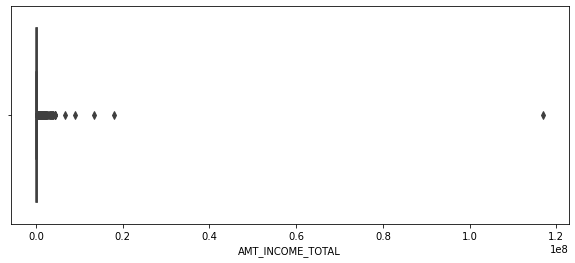

In [668]:
# Plot boxplot of AMT_INCOME_TOTAL 
plt.figure(figsize=(10,4))
sns.boxplot(application_data.AMT_INCOME_TOTAL)
plt.show()

In [669]:
# Differance between mean and median
application_data1.AMT_INCOME_TOTAL.mean() - application_data1.AMT_INCOME_TOTAL.median()

20335.419068149175

#### We can see that there are few income values which are far long than upper fence. These values are not outlier but these are few people with much higher income than large population size. Because of that we have to use median rather than mean while analysing this variable.

#### From above information we can say that income column has potential outlier as 117000000 income. We can fill na values if any by using meadian rather than mean.   Because there is huge differance between mean and median.

In [670]:
# for analysis perpose it is good to drop such high value income row.
application_data1 = application_data1[~(application_data1.AMT_INCOME_TOTAL>110000000)]

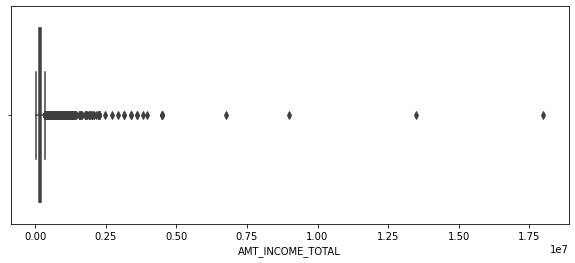

In [671]:
# Now plot income box plot again
plt.figure(figsize=(10,4))
sns.boxplot(application_data1.AMT_INCOME_TOTAL)
plt.show()

In [672]:
# Handling DAYS_BIRTH column
# First change DAYS_BIRTH column from days to years and remove "-" sign.
application_data1.DAYS_BIRTH = application_data1.DAYS_BIRTH.astype(str).str.replace("-","").astype(int)//365
application_data1.DAYS_BIRTH.value_counts()


38    8856
37    8786
39    8763
40    8609
36    8602
27    8460
41    8438
31    8372
43    8304
42    8205
28    7961
32    7906
44    7806
30    7793
35    7790
33    7703
29    7661
34    7620
54    7548
53    7453
46    7287
45    7201
47    7012
48    6973
56    6826
57    6766
52    6760
51    6685
55    6632
59    6628
49    6619
50    6475
58    6263
60    6223
62    5512
61    5413
63    5193
64    5115
26    4550
25    4167
23    4051
24    3898
65    3113
22    2926
66    2085
67    2042
21    1244
68     866
69      16
20       1
Name: DAYS_BIRTH, dtype: int64

In [673]:
# Change column name from DAYS_BIRTH to age
# YR_AGE =  Means age of customer in years. 
application_data1.rename(columns={"DAYS_BIRTH" : "YR_AGE"},inplace=True)
application_data1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YR_AGE,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_DOCUMENT_4,FLAG_DOCUMENT_10,FLAG_DOCUMENT_12
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,-637,Laborers,1,2,Business Entity Type 3,-3648,-2120,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,45,-1188,Core staff,2,1,School,-1186,-291,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,-225,Laborers,1,2,Government,-4260,-2531,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,-3039,Laborers,2,2,Business Entity Type 3,-9833,-2437,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,-3038,Core staff,1,2,Religion,-4311,-3458,0,0,0


In [674]:
# Describe YR_AGE column
application_data1.YR_AGE.describe()

count    307178.000000
mean         43.441236
std          11.954730
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: YR_AGE, dtype: float64

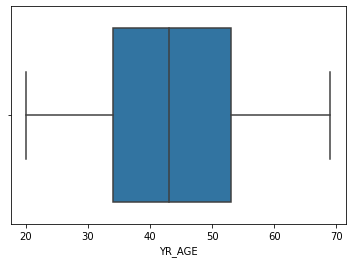

In [675]:
# Plot box plot
sns.boxplot(application_data1.YR_AGE)
plt.show()

#### From above observation we can say that there is no any potential outlier in YR_AGE column and approx. 50% of population comes under 35 to 55 age

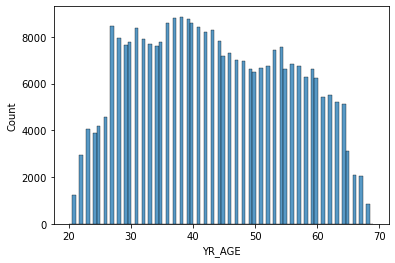

In [676]:
# plot histogram for age column
sns.histplot(application_data1.YR_AGE)
plt.show()

#### There is large population distribution from age 25 to 60

In [677]:
# Handling DAYS_EMPLOYED column
# counting frequency of each value
application_data1.DAYS_EMPLOYED.value_counts()   

 365243    55349
-200         156
-224         152
-230         151
-199         151
           ...  
-12477         1
-10358         1
-13680         1
-7828          1
-8694          1
Name: DAYS_EMPLOYED, Length: 12572, dtype: int64

In [678]:
# First change DAYS_EMPLOYED column from days to years and remove "-" sign.
application_data1.DAYS_EMPLOYED = application_data1.DAYS_EMPLOYED.astype(str).str.replace("-","").astype(int)//365
application_data1.DAYS_EMPLOYED.value_counts()

1000    55349
1       31803
2       29604
0       27880
3       25077
4       21733
5       16247
6       15028
7       13133
8       11426
9        8969
10       7360
11       5890
12       5304
14       4642
13       4342
15       2723
16       2332
17       2002
18       1915
19       1869
20       1600
21       1458
22       1253
23       1016
24        914
25        821
27        655
26        653
28        611
29        567
30        457
31        435
34        364
32        351
33        331
35        256
36        196
37        138
39        125
38        116
40         59
41         59
42         42
44         31
43         18
45         14
48          4
46          4
47          1
49          1
Name: DAYS_EMPLOYED, dtype: int64

In [679]:
# Change column name from DAYS_EMPLOYED to year employed
# YR_EMPLOYED = Means year of current employment before application to loan. 
application_data1.rename(columns={"DAYS_EMPLOYED" : "YR_EMPLOYED"},inplace=True)
application_data1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YR_AGE,YR_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_DOCUMENT_4,FLAG_DOCUMENT_10,FLAG_DOCUMENT_12
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,1,Laborers,1,2,Business Entity Type 3,-3648,-2120,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,45,3,Core staff,2,1,School,-1186,-291,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,0,Laborers,1,2,Government,-4260,-2531,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,8,Laborers,2,2,Business Entity Type 3,-9833,-2437,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,8,Core staff,1,2,Religion,-4311,-3458,0,0,0


In [680]:
# Describe YR_EMPLOYED column
application_data1.YR_EMPLOYED.describe()

count    307178.000000
mean        185.135075
std         382.066158
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        1000.000000
Name: YR_EMPLOYED, dtype: float64

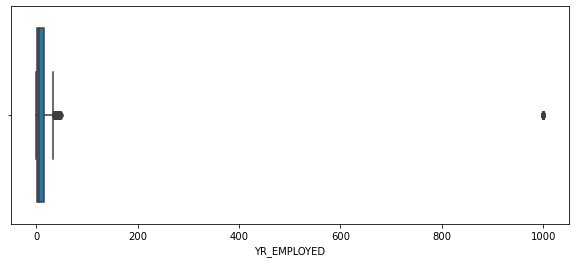

In [681]:
# Plot box plot for YR_EMPLOYED column
plt.figure(figsize=(10,4))
sns.boxplot(application_data1.YR_EMPLOYED)
plt.show()

#### From above box plot and other information we can say that there are more than 55000 values are with 1000 year. Which is practicaly not possible. So we can change those values by using median value because mean is affected by 1000 year values.

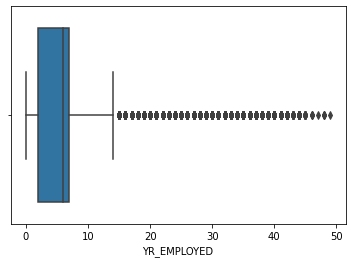

count    307178.000000
mean          6.030757
std           5.810013
min           0.000000
25%           2.000000
50%           6.000000
75%           7.000000
max          49.000000
Name: YR_EMPLOYED, dtype: float64

In [682]:
# Replacing all 1000 year values by median that is 6.
application_data1.YR_EMPLOYED = application_data1.YR_EMPLOYED.apply(lambda x : 6 if x == 1000 else x)
# Describe and plot YR_EMPLOYED again
sns.boxplot(application_data1.YR_EMPLOYED)
plt.show()
application_data1.YR_EMPLOYED.describe()

In [683]:
# Handling DAYS_REGISTRATION column
# counting frequency of each value
application_data1.DAYS_REGISTRATION.value_counts()  


-1        113
-7         97
-6         96
-2         92
-4         92
         ... 
-18098      1
-17736      1
-15281      1
-12772      1
-14798      1
Name: DAYS_REGISTRATION, Length: 15687, dtype: int64

In [684]:
# First change DAYS_REGISTRATION column from days to years and remove "-" sign.
application_data1.DAYS_REGISTRATION = application_data1.DAYS_REGISTRATION.astype(str).str.replace("-","").astype(int)//365
application_data1.DAYS_REGISTRATION.value_counts()

0     16843
1     15555
2     14978
3     12984
12    12941
      ...  
54        2
60        1
65        1
67        1
64        1
Name: DAYS_REGISTRATION, Length: 66, dtype: int64

In [685]:
# Change column name from DAYS_REGISTRATION to year.
# YR_REGISTRATION = Means how many year before client change registration. 
application_data1.rename(columns={"DAYS_REGISTRATION" : "YR_REGISTRATION"},inplace=True)
application_data1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YR_AGE,YR_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,YR_REGISTRATION,DAYS_ID_PUBLISH,FLAG_DOCUMENT_4,FLAG_DOCUMENT_10,FLAG_DOCUMENT_12
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,1,Laborers,1,2,Business Entity Type 3,9,-2120,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,45,3,Core staff,2,1,School,3,-291,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,0,Laborers,1,2,Government,11,-2531,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,8,Laborers,2,2,Business Entity Type 3,26,-2437,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,8,Core staff,1,2,Religion,11,-3458,0,0,0


In [686]:
application_data1.YR_REGISTRATION.value_counts()

0     16843
1     15555
2     14978
3     12984
12    12941
      ...  
54        2
60        1
65        1
67        1
64        1
Name: YR_REGISTRATION, Length: 66, dtype: int64

In [687]:
# Handling DAYS_ID_PUBLISH column
# counting frequency of each value
application_data1.DAYS_ID_PUBLISH.value_counts()  


-4053    168
-4095    162
-4046    161
-4417    159
-4256    157
        ... 
-5913      1
-6144      1
-6203      1
-6103      1
-6211      1
Name: DAYS_ID_PUBLISH, Length: 6168, dtype: int64

In [688]:
# First change DAYS_ID_PUBLISH column from days to years and remove "-" sign.
application_data1.DAYS_ID_PUBLISH = application_data1.DAYS_ID_PUBLISH.astype(str).str.replace("-","").astype(int)//365
application_data1.DAYS_ID_PUBLISH.value_counts()

11    44223
12    38421
10    21307
13    20543
7     19216
9     19173
8     18644
6     18405
2     17365
5     17178
3     17038
4     16566
1     15798
0     14896
14     5529
15     1989
16      848
17       38
19        1
Name: DAYS_ID_PUBLISH, dtype: int64

In [689]:
# Change column name from DAYS_ID_PUBLISH to YR_ID_PUBLISH.
# YR_ID_PUBLISH = Means year of current employment before application to loan. 
application_data1.rename(columns={"DAYS_ID_PUBLISH" : "YR_ID_PUBLISH"},inplace=True)
application_data1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YR_AGE,YR_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,YR_REGISTRATION,YR_ID_PUBLISH,FLAG_DOCUMENT_4,FLAG_DOCUMENT_10,FLAG_DOCUMENT_12
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,1,Laborers,1,2,Business Entity Type 3,9,5,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,45,3,Core staff,2,1,School,3,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,0,Laborers,1,2,Government,11,6,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,8,Laborers,2,2,Business Entity Type 3,26,6,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,8,Core staff,1,2,Religion,11,9,0,0,0


In [690]:
application_data1.YR_REGISTRATION.value_counts()

0     16843
1     15555
2     14978
3     12984
12    12941
      ...  
54        2
60        1
65        1
67        1
64        1
Name: YR_REGISTRATION, Length: 66, dtype: int64

In [691]:
# Handling CNT_FAM_MEMBERS column
# Describe CNT_FAM_MEMBERS column
application_data1.CNT_FAM_MEMBERS.describe()

count    307178.000000
mean          2.151547
std           0.905211
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           7.000000
Name: CNT_FAM_MEMBERS, dtype: float64

<AxesSubplot:xlabel='CNT_FAM_MEMBERS', ylabel='Count'>

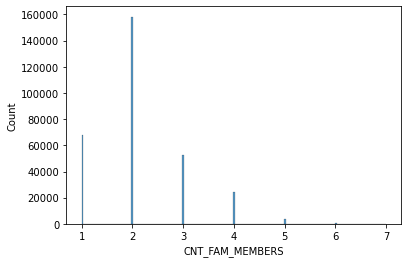

In [692]:
# Plot histogram
sns.histplot(application_data1.CNT_FAM_MEMBERS)

#### There is no any outlier in CNT_FAM_MEMBERS column but there are lots of customer with 2 family member.

In [693]:
# Reset index numbers
application_data1.reset_index(drop=True,inplace=True)
application_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307178 entries, 0 to 307177
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307178 non-null  object 
 1   TARGET                       307178 non-null  int64  
 2   NAME_CONTRACT_TYPE           307178 non-null  object 
 3   CODE_GENDER                  307178 non-null  object 
 4   FLAG_OWN_CAR                 307178 non-null  object 
 5   FLAG_OWN_REALTY              307178 non-null  object 
 6   CNT_CHILDREN                 307178 non-null  int64  
 7   AMT_INCOME_TOTAL             307178 non-null  float64
 8   AMT_CREDIT                   307178 non-null  float64
 9   AMT_ANNUITY                  307178 non-null  float64
 10  AMT_GOODS_PRICE              307178 non-null  float64
 11  NAME_INCOME_TYPE             307178 non-null  object 
 12  NAME_EDUCATION_TYPE          307178 non-null  object 
 13 

# 2. DATA ANALYSIS :

In [694]:
# print shape and head of application_data1 before starting analysis
print(application_data1.shape)
application_data1.head()

(307178, 27)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YR_AGE,YR_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,YR_REGISTRATION,YR_ID_PUBLISH,FLAG_DOCUMENT_4,FLAG_DOCUMENT_10,FLAG_DOCUMENT_12
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,1,Laborers,1,2,Business Entity Type 3,9,5,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,45,3,Core staff,2,1,School,3,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,0,Laborers,1,2,Government,11,6,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,8,Laborers,2,2,Business Entity Type 3,26,6,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,8,Core staff,1,2,Religion,11,9,0,0,0


### 1. Univariate analysis

####  Categorical univariate analysis

In [695]:
# Univariate analysis of NAME_FAMILY_STATUS column
# calculate the percentage of each marital status category.
application_data1.NAME_FAMILY_STATUS.value_counts(normalize=True)*100

Married                 63.880226
Single / not married    14.773193
Civil marriage           9.683311
Separated                6.431125
Widow                    5.232146
Name: NAME_FAMILY_STATUS, dtype: float64

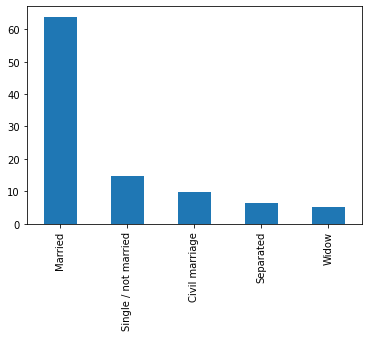

In [696]:
# Plot bar graph of NAME_FAMILY_STATUS
(application_data1.NAME_FAMILY_STATUS.value_counts(normalize=True)*100).plot.bar()
plt.show()

#### From above bar plot we can say that more than 60% of customer are belongs to married category.

In [697]:
# Univariate analysis of ORGANIZATION_TYPE column
# calculate the percentage of each ORGANIZATION_TYPE  category.
application_data1.ORGANIZATION_TYPE.value_counts(normalize=True)*100

Business Entity Type 3    22.111610
XNA                       18.018543
Self-employed             12.484944
Other                      5.423891
Medicine                   3.639909
Business Entity Type 2     3.431561
Government                 3.382078
School                     2.890832
Trade: type 7              2.547708
Kindergarten               2.235837
Construction               2.185703
Business Entity Type 1     1.947080
Transport: type 4          1.755334
Trade: type 3              1.135824
Industry: type 9           1.095782
Industry: type 3           1.066483
Security                   1.055089
Housing                    0.960355
Industry: type 11          0.879946
Military                   0.856181
Bank                       0.815488
Agriculture                0.796932
Police                     0.760797
Transport: type 2          0.717174
Postal                     0.700897
Security Ministries        0.641648
Trade: type 2              0.615930
Restaurant                 0

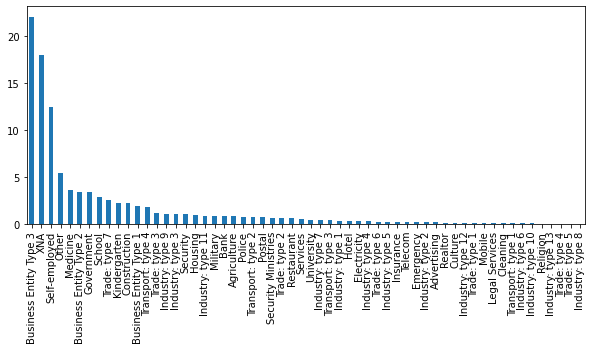

In [698]:
# Plot bar graph of ORGANIZATION_TYPE.
plt.figure(figsize=(10,4))
(application_data1.ORGANIZATION_TYPE.value_counts(normalize=True)*100).plot.bar()
plt.show()

#### From above bar plot we can say that more than 50% of customer are belongs to Business type 3, XNA and self-employed category.

In [699]:
# Univariate analysis of NAME_INCOME_TYPE column
# calculate the percentage of each INCOME  category.
application_data1.NAME_INCOME_TYPE.value_counts(normalize=True)*100

Working                 51.616327
Commercial associate    23.295288
Pensioner               18.014311
State servant            7.056169
Unemployed               0.007162
Student                  0.005860
Businessman              0.003255
Maternity leave          0.001628
Name: NAME_INCOME_TYPE, dtype: float64

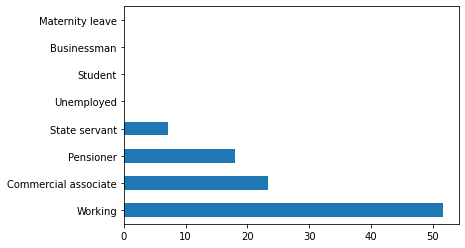

In [700]:
# Plot bar plot for NAME_INCOME_TYPE column.
(application_data1.NAME_INCOME_TYPE.value_counts(normalize=True)*100).plot.barh()
plt.show()

#### From above bar plot we can say that more than 50% of customer are belongs to working category.

In [701]:
# Univariate analysis of NAME_EDUCATION_TYPE column
# calculate the percentage of each EDUCATION  category.
application_data1.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100

Secondary / secondary special    71.018432
Higher education                 24.345819
Incomplete higher                 3.342036
Lower secondary                   1.240323
Academic degree                   0.053389
Name: NAME_EDUCATION_TYPE, dtype: float64

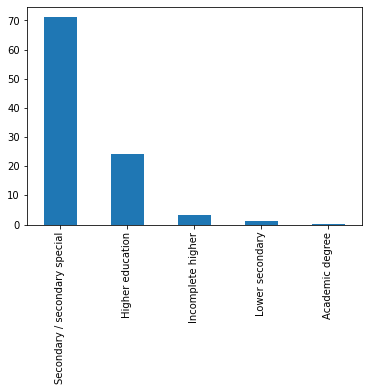

In [702]:
# Plot bar plot for NAME_EDUCATION_TYPE column.
(application_data1.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100).plot.bar()
plt.show()

#### From above bar plot we can say that more than 70% of customer are belongs to secondary education category.

In [703]:
# Univariate analysis of NAME_HOUSING_TYPE column
# calculate the percentage of each HOUSING status category.
application_data1.NAME_HOUSING_TYPE.value_counts(normalize=True)*100

House / apartment      88.737800
With parents            4.825215
Municipal apartment     3.634049
Rented apartment        1.587028
Office apartment        0.851298
Co-op apartment         0.364609
Name: NAME_HOUSING_TYPE, dtype: float64

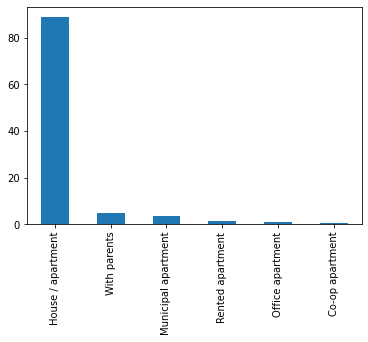

In [704]:
# Plot bar plot for NAME_HOUSING_TYPE column.
(application_data1.NAME_HOUSING_TYPE.value_counts(normalize=True)*100).plot.bar()
plt.show()

#### From above bar plot we can say that more than 85% of clients have self-occupied apartment.

In [705]:
# Univariate analysis of OCCUPATION_TYPE column
# calculate the percentage of each OCCUPATION_TYPE  category.
application_data1.OCCUPATION_TYPE.value_counts(normalize=True)*100

Laborers                 49.303010
Sales staff              10.436294
Core staff                8.959952
Managers                  6.948740
Drivers                   6.050889
High skill tech staff     3.700786
Accountants               3.190658
Medicine staff            2.775915
Security staff            2.184401
Cooking staff             1.933407
Cleaning staff            1.511827
Private service staff     0.862041
Low-skill Laborers        0.681038
Waiters/barmen staff      0.437857
Secretaries               0.424510
Realty agents             0.244484
HR staff                  0.183281
IT staff                  0.170911
Name: OCCUPATION_TYPE, dtype: float64

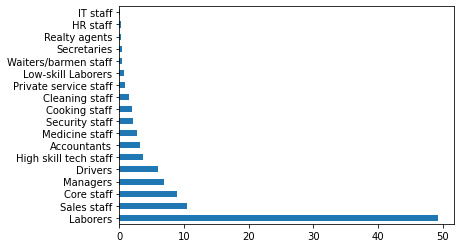

In [706]:
# Plot bar plot for OCCUPATION_TYPE column.
(application_data1.OCCUPATION_TYPE.value_counts(normalize=True)*100).plot.barh()
plt.show()

#### From above bar plot we can say that more than 50% of clients are from Laborers and Sales staff  category.

In [707]:
# Univariate analysis of NAME_CONTRACT_TYPE column
# calculate the percentage of each CONTRACT  category.
application_data1.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100

Cash loans         90.559545
Revolving loans     9.440455
Name: NAME_CONTRACT_TYPE, dtype: float64

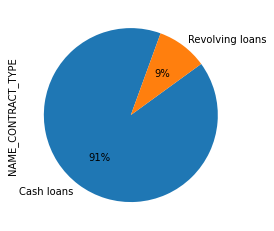

In [708]:
# Plot pie plot for NAME_CONTRACT_TYPE column.
(application_data1.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100).plot.pie(autopct="%.0f%%",startangle=70)
plt.show()

#### From above pie plot we can say that more than 90% of clients are opt for cash loan category.

In [709]:
# Univariate analysis of TARGET column
# calculate the percentage of each client with payment difficulties  category.
application_data1.TARGET.value_counts(normalize=True)*100

0    91.928458
1     8.071542
Name: TARGET, dtype: float64

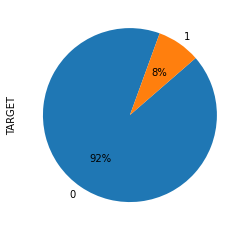

In [710]:
# Plot pie plot for TARGET column. To find data imbalance.
(application_data1.TARGET.value_counts(normalize=True)*100).plot.pie(autopct="%.0f%%",startangle=70)
plt.show()

#### From above pie chart diegram we find that approx 8% of total clients make default while making loan payment. and almost 92% people make payment successfully. That is perentage of data imbalance.

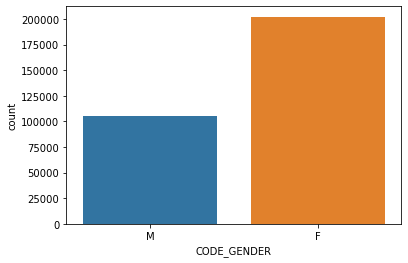

In [711]:
# Univariate analysis of CODE_GENDER column
# plot count plot to find gender-wise count.
sns.countplot(application_data1.CODE_GENDER)
plt.show()

In [712]:
# Counts of gender in %
application_data1.CODE_GENDER.value_counts(normalize=True)*100

F    65.835118
M    34.164882
Name: CODE_GENDER, dtype: float64

#### From above count plot we can say that more than 65% loan takers come from female category.

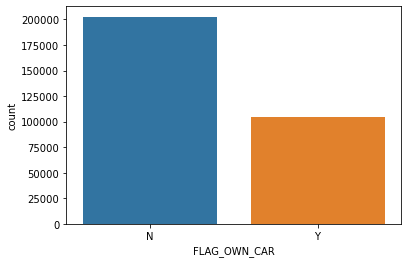

In [713]:
# Univariate analysis of FLAG_OWN_CAR column
# plot count plot to find count of owned car .
sns.countplot(application_data1.FLAG_OWN_CAR)
plt.show()

#### Most of clients have not their own car.

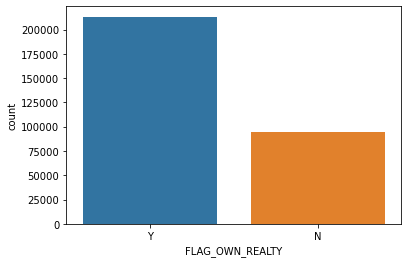

In [714]:
# Univariate analysis of FLAG_OWN_REALTY column
# plot count plot to find count of owned property .
sns.countplot(application_data1.FLAG_OWN_REALTY)
plt.show()

#### More than 200000 of clients have their own property.

#### Numerical univariate analysis

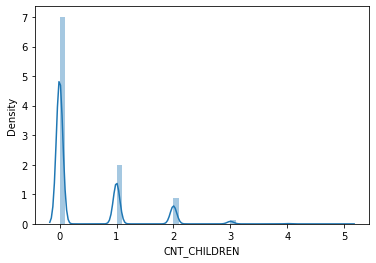

In [715]:
# univariate analysis of CNT_CHILDREN column.
# plot dist-plot 
sns.distplot(application_data1.CNT_CHILDREN)
plt.show()

#### Most of clients have no child.

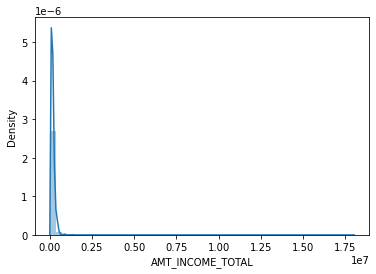

In [716]:
# univariate analysis of AMT_INCOME_TOTAL column.
# plot dist-plot 
sns.distplot(application_data1.AMT_INCOME_TOTAL)
plt.show()

In [717]:
# Calculate mean of income column.
application_data1.AMT_INCOME_TOTAL.mean()

168455.0820499352

#### Clients average income is approx 168000.

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Density'>

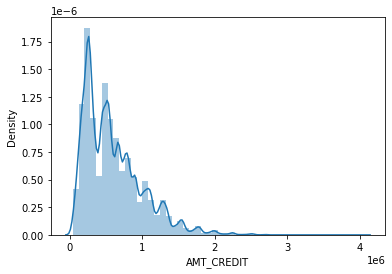

In [718]:
# univariate analysis of AMT_CREDIT column.
# plot dist-plot 
sns.distplot(application_data1.AMT_CREDIT)

In [719]:
# Calculate mean of AMT_CREDIT column.
application_data1.AMT_CREDIT.mean()

599328.5908723932

#### clients average credit amount is 600000 and most of client's credit amount is below 1000000.

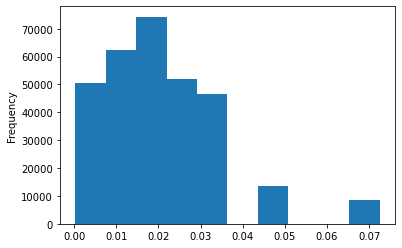

In [720]:
# univariate analysis of REGION_POPULATION_RELATIVE column.
# plot dist-plot 
application_data1.REGION_POPULATION_RELATIVE.plot.hist()
plt.show()

#### Most of clients come from 0.00 to 0.03 normalize population.

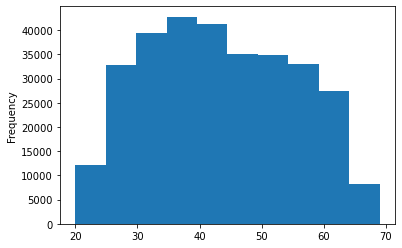

In [721]:
# univariate analysis of YR_AGE column.
# plot dist-plot 
application_data1.YR_AGE.plot.hist()
plt.show()

#### There is large age distribution from 25 to 60

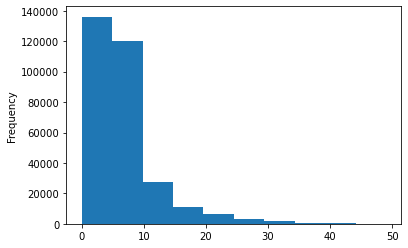

In [722]:
# univariate analysis of YR_EMPLOYED column.
# plot dist-plot 
application_data1.YR_EMPLOYED.plot.hist()
plt.show()

#### Most of clients have less than 10 year experience 

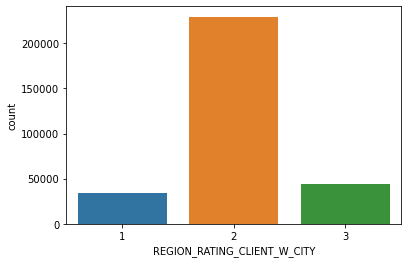

In [723]:
# univariate analysis of REGION_RATING_CLIENT_W_CITY column.
# plot dist-plot 
sns.countplot(application_data1.REGION_RATING_CLIENT_W_CITY)
plt.show()

#### Most of clients come from 2 city rating.

### 2. Segmented Univariate Analysis

##### First we have to make two datasets with default payment and Non-default payment.

In [724]:
# Dataset with default payment(default_dataset)
default_dataset = application_data1[application_data1.TARGET==1]
default_dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YR_AGE,YR_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,YR_REGISTRATION,YR_ID_PUBLISH,FLAG_DOCUMENT_4,FLAG_DOCUMENT_10,FLAG_DOCUMENT_12
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,1,Laborers,1,2,Business Entity Type 3,9,5,0,0,0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Working,Secondary / secondary special,Widow,House / apartment,0.018029,51,7,Cooking staff,1,2,Business Entity Type 3,18,5,0,0,0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,47,3,Laborers,2,2,Business Entity Type 3,3,2,0,0,0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,36,9,Sales staff,2,3,Self-employed,0,12,0,0,0
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,67,6,Laborers,2,2,XNA,14,11,0,0,0


In [725]:
# Dataset with non-default payment(nondefault_dataset)
nondefault_dataset = application_data1[application_data1.TARGET!=1]
nondefault_dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YR_AGE,YR_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,YR_REGISTRATION,YR_ID_PUBLISH,FLAG_DOCUMENT_4,FLAG_DOCUMENT_10,FLAG_DOCUMENT_12
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,45,3,Core staff,2,1,School,3,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,0,Laborers,1,2,Government,11,6,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,8,Laborers,2,2,Business Entity Type 3,26,6,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,8,Core staff,1,2,Religion,11,9,0,0,0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,0.035792,46,4,Laborers,2,2,Other,13,1,0,0,0


#### Numerical sagmented univariate analysis

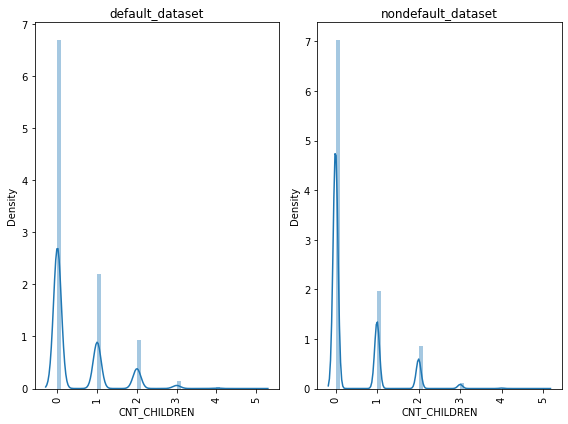

default_dataset_children_mean : 0.4613212874082439
nondefault_dataset_children_mean : 0.41192489659470793


In [726]:
# CNT_CHILDREN sgmented univariate analysis.
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.distplot(default_dataset.CNT_CHILDREN)
plt.xticks(rotation=90)
plt.title("default_dataset")
plt.subplot(1,2,2)
sns.distplot(nondefault_dataset.CNT_CHILDREN)
plt.xticks(rotation=90)
plt.title("nondefault_dataset")
plt.tight_layout()
plt.show()
print("default_dataset_children_mean :",default_dataset.CNT_CHILDREN.mean())
print("nondefault_dataset_children_mean :",nondefault_dataset.CNT_CHILDREN.mean())

#### Default dataset has slightly higher average of childen than nondefault dataset

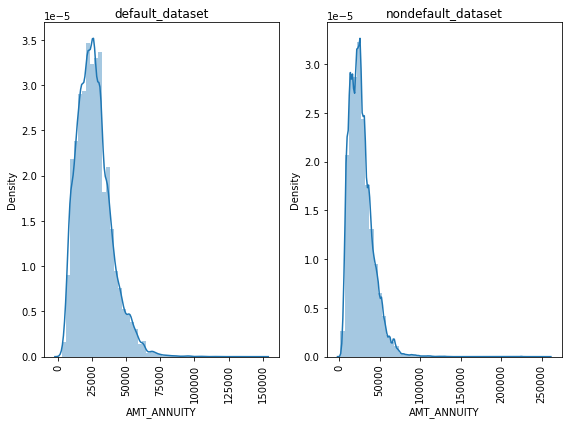

default_dataset_AMT_ANNUITY_mean : 26491.765164959263
nondefault_dataset_AMT_ANNUITY_mean : 27175.98624745028


In [727]:
# AMT_ANNUITY sgmented univariate analysis.
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.distplot(default_dataset.AMT_ANNUITY)
plt.xticks(rotation=90)
plt.title("default_dataset")
plt.subplot(1,2,2)
sns.distplot(nondefault_dataset.AMT_ANNUITY)
plt.xticks(rotation=90)
plt.title("nondefault_dataset")
plt.tight_layout()
plt.show()
print("default_dataset_AMT_ANNUITY_mean :",default_dataset.AMT_ANNUITY.mean())
print("nondefault_dataset_AMT_ANNUITY_mean :",nondefault_dataset.AMT_ANNUITY.mean())

#### Not too much differance in default and nondefault annuity. 

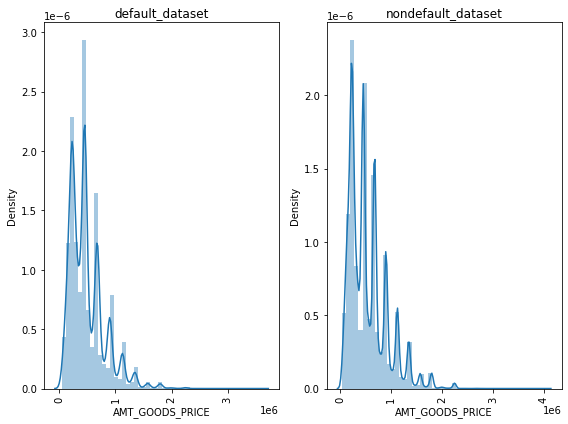

default_dataset_AMT_GOODS_PRICE_mean : 488965.8070904251
nondefault_dataset_AMT_GOODS_PRICE_mean : 542752.3541560428


In [728]:
# AMT_GOODS_PRICE sgmented univariate analysis.
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.distplot(default_dataset.AMT_GOODS_PRICE)
plt.xticks(rotation=90)
plt.title("default_dataset")
plt.subplot(1,2,2)
sns.distplot(nondefault_dataset.AMT_GOODS_PRICE)
plt.xticks(rotation=90)
plt.title("nondefault_dataset")
plt.tight_layout()
plt.show()
print("default_dataset_AMT_GOODS_PRICE_mean :",default_dataset.AMT_GOODS_PRICE.mean())
print("nondefault_dataset_AMT_GOODS_PRICE_mean :",nondefault_dataset.AMT_GOODS_PRICE.mean())

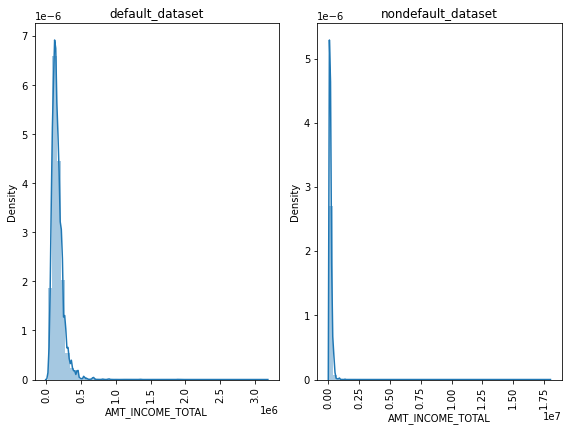

default_dataset_AMT_INCOME_TOTAL_median : 135000.0
nondefault_dataset_AMT_INCOME_TOTAL_median : 148500.0


In [729]:
# AMT_INCOME_TOTAL sgmented univariate analysis.
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.distplot(default_dataset.AMT_INCOME_TOTAL)
plt.xticks(rotation=90)
plt.title("default_dataset")
plt.subplot(1,2,2)
sns.distplot(nondefault_dataset.AMT_INCOME_TOTAL)
plt.xticks(rotation=90)
plt.title("nondefault_dataset")
plt.tight_layout()
plt.show()
print("default_dataset_AMT_INCOME_TOTAL_median :",default_dataset.AMT_INCOME_TOTAL.median())
print("nondefault_dataset_AMT_INCOME_TOTAL_median :",nondefault_dataset.AMT_INCOME_TOTAL.median())

#### From above information we can say that lower income population had made more default.

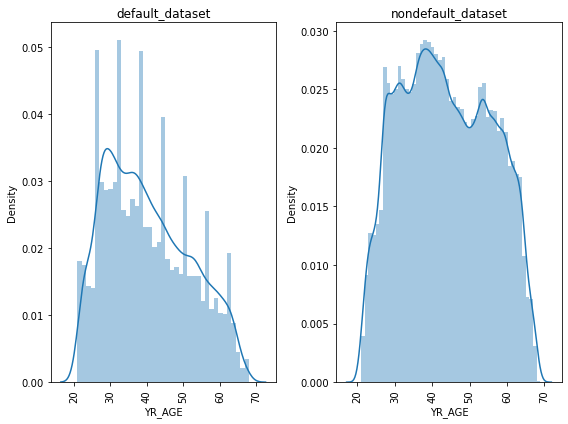

default_dataset_YR_AGE_mean : 40.279019117528435
nondefault_dataset_YR_AGE_mean : 43.71888633916936


In [730]:
# YR_AGE sgmented univariate analysis.
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.distplot(default_dataset.YR_AGE)
plt.xticks(rotation=90)
plt.title("default_dataset")
plt.subplot(1,2,2)
sns.distplot(nondefault_dataset.YR_AGE)
plt.xticks(rotation=90)
plt.title("nondefault_dataset")
plt.tight_layout()
plt.show()
print("default_dataset_YR_AGE_mean :",default_dataset.YR_AGE.mean())
print("nondefault_dataset_YR_AGE_mean :",nondefault_dataset.YR_AGE.mean())

#### Lower age clients make more default than high age clients

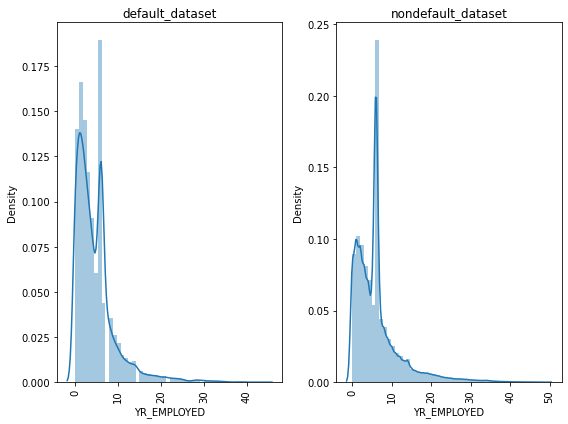

default_dataset_YR_EMPLOYED_mean : 4.661611680245221
nondefault_dataset_YR_EMPLOYED_mean : 6.150971726443425


In [731]:
# YR_EMPLOYED sgmented univariate analysis.
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.distplot(default_dataset.YR_EMPLOYED)
plt.xticks(rotation=90)
plt.title("default_dataset")
plt.subplot(1,2,2)
sns.distplot(nondefault_dataset.YR_EMPLOYED)
plt.xticks(rotation=90)
plt.title("nondefault_dataset")
plt.tight_layout()
plt.show()
print("default_dataset_YR_EMPLOYED_mean :",default_dataset.YR_EMPLOYED.mean())
print("nondefault_dataset_YR_EMPLOYED_mean :",nondefault_dataset.YR_EMPLOYED.mean())

#### Lower current organization experience clients made more default than higher continuous experience clients.

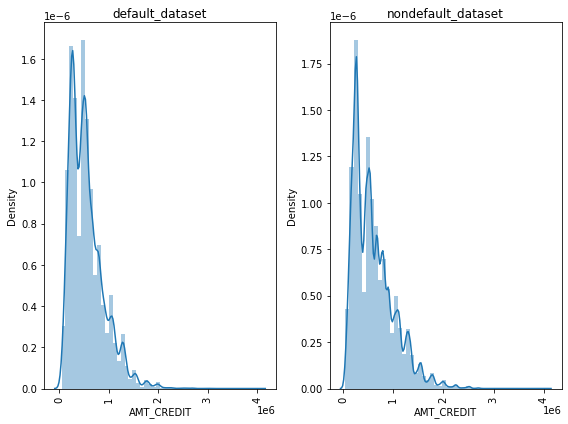

default_dataset_AMT_CREDIT_mean : 558032.4847947084
nondefault_dataset_AMT_CREDIT_mean : 602954.4891318205


In [732]:
# AMT_CREDIT sgmented univariate analysis.
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.distplot(default_dataset.AMT_CREDIT)
plt.xticks(rotation=90)
plt.title("default_dataset")
plt.subplot(1,2,2)
sns.distplot(nondefault_dataset.AMT_CREDIT)
plt.xticks(rotation=90)
plt.title("nondefault_dataset")
plt.tight_layout()
plt.show()
print("default_dataset_AMT_CREDIT_mean :",default_dataset.AMT_CREDIT.mean())
print("nondefault_dataset_AMT_CREDIT_mean :",nondefault_dataset.AMT_CREDIT.mean())

#### there are more chances to make default if credit loan amount is less.

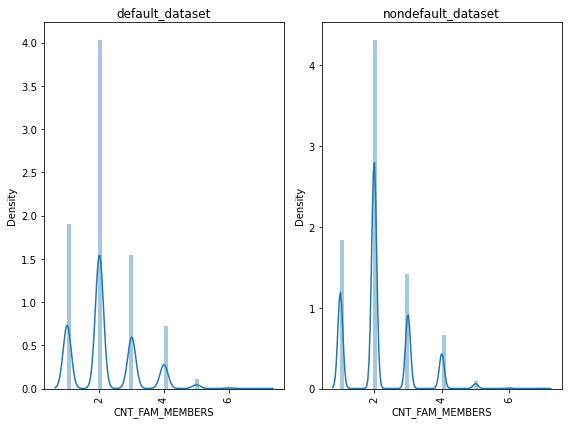

default_dataset_CNT_FAM_MEMBERST_mean : 2.178672259417601
nondefault_dataset_CNT_FAM_MEMBERS_mean : 2.1491656751090713


In [733]:
# CNT_FAM_MEMBERS sgmented univariate analysis.
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.distplot(default_dataset.CNT_FAM_MEMBERS)
plt.xticks(rotation=90)
plt.title("default_dataset")
plt.subplot(1,2,2)
sns.distplot(nondefault_dataset.CNT_FAM_MEMBERS)
plt.xticks(rotation=90)
plt.title("nondefault_dataset")
plt.tight_layout()
plt.show()
print("default_dataset_CNT_FAM_MEMBERST_mean :",default_dataset.CNT_FAM_MEMBERS.mean())
print("nondefault_dataset_CNT_FAM_MEMBERS_mean :",nondefault_dataset.CNT_FAM_MEMBERS.mean())

#### Average family members in default dataset is slightly higher than nondefault dataset.

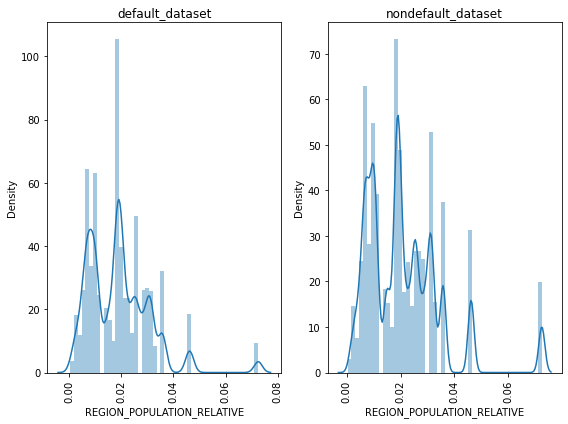

default_dataset_REGION_POPULATION_RELATIVE_mean : 0.019135860288780514
nondefault_dataset_REGION_POPULATION_RELATIVE_mean : 0.021022855615059965


In [734]:
# REGION_POPULATION_RELATIVE sgmented univariate analysis.
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.distplot(default_dataset.REGION_POPULATION_RELATIVE)
plt.xticks(rotation=90)
plt.title("default_dataset")
plt.subplot(1,2,2)
sns.distplot(nondefault_dataset.REGION_POPULATION_RELATIVE)
plt.xticks(rotation=90)
plt.title("nondefault_dataset")
plt.tight_layout()
plt.show()
print("default_dataset_REGION_POPULATION_RELATIVE_mean :",default_dataset.REGION_POPULATION_RELATIVE.mean())
print("nondefault_dataset_REGION_POPULATION_RELATIVE_mean :",nondefault_dataset.REGION_POPULATION_RELATIVE.mean())

#### Categorical sgmented univariate analysis

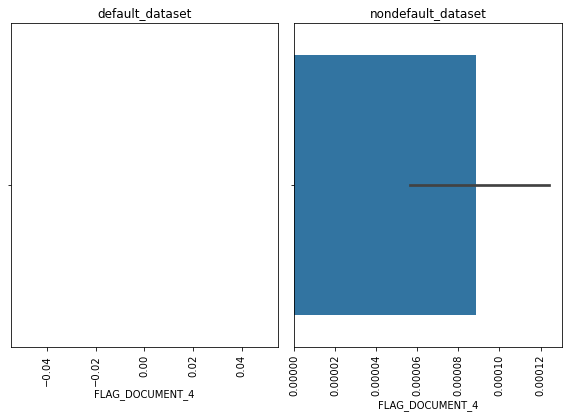

In [741]:
# FLAG_DOCUMENT_4 sgmented univariate analysis.
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.barplot(default_dataset.FLAG_DOCUMENT_4)
plt.xticks(rotation=90)
plt.title("default_dataset")
plt.subplot(1,2,2)
sns.barplot(nondefault_dataset.FLAG_DOCUMENT_4)
plt.xticks(rotation=90)
plt.title("nondefault_dataset")
plt.tight_layout()
plt.show()

#### None of the client provide DOCUMENT_4 who belongs to default-payment category.

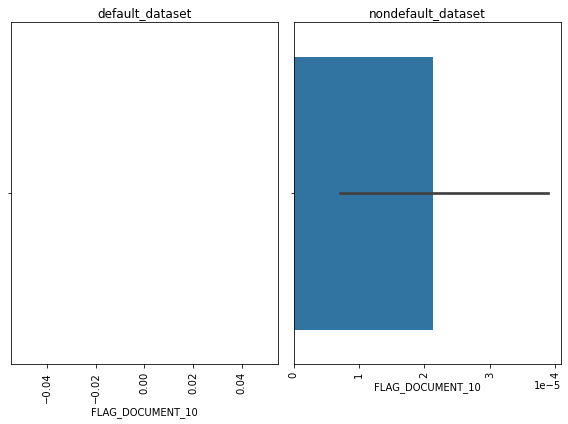

In [743]:
# FLAG_DOCUMENT_10 sgmented univariate analysis.
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.barplot(default_dataset.FLAG_DOCUMENT_10)
plt.xticks(rotation=90)
plt.title("default_dataset")
plt.subplot(1,2,2)
sns.barplot(nondefault_dataset.FLAG_DOCUMENT_10)
plt.xticks(rotation=90)
plt.title("nondefault_dataset")
plt.tight_layout()
plt.show()

#### None of the client provide DOCUMENT_10 who belongs to default-payment category.

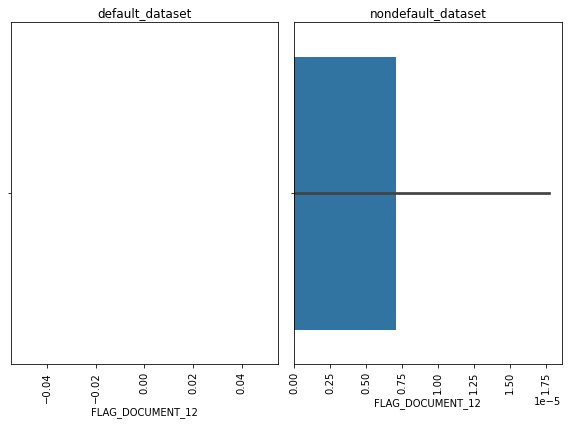

In [744]:
# FLAG_DOCUMENT_12 sgmented univariate analysis.
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.barplot(default_dataset.FLAG_DOCUMENT_12)
plt.xticks(rotation=90)
plt.title("default_dataset")
plt.subplot(1,2,2)
sns.barplot(nondefault_dataset.FLAG_DOCUMENT_12)
plt.xticks(rotation=90)
plt.title("nondefault_dataset")
plt.tight_layout()
plt.show()

#### None of the client provide DOCUMENT_12 who belongs to default-payment category.

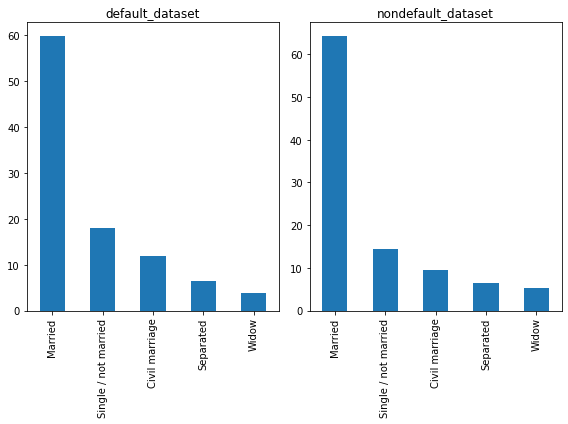

In [541]:
# NAME_FAMILY_STATUS sgmented univariate analysis.
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
(default_dataset.NAME_FAMILY_STATUS.value_counts(normalize=True)*100).plot.bar()
plt.xticks(rotation=90)
plt.title("default_dataset")
plt.subplot(1,2,2)
(nondefault_dataset.NAME_FAMILY_STATUS.value_counts(normalize=True)*100).plot.bar()
plt.xticks(rotation=90)
plt.title("nondefault_dataset")
plt.tight_layout()
plt.show()

#### From above figure we can say that most of default and non-default cliants are from married marital status.

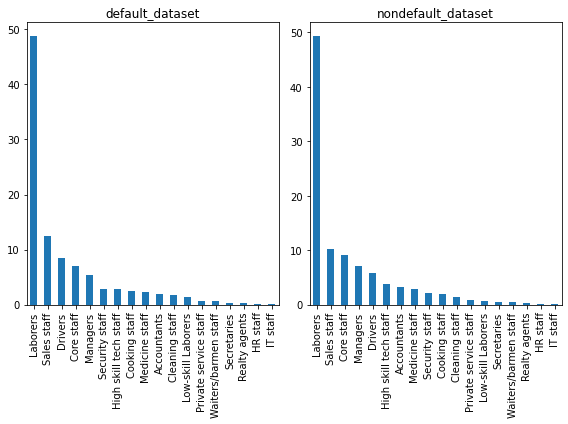

In [545]:
# OCCUPATION_TYPE sgmented univariate analysis.
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
(default_dataset.OCCUPATION_TYPE.value_counts(normalize=True)*100).plot.bar()
plt.xticks(rotation=90)
plt.title("default_dataset")
plt.subplot(1,2,2)
(nondefault_dataset.OCCUPATION_TYPE.value_counts(normalize=True)*100).plot.bar()
plt.xticks(rotation=90)
plt.title("nondefault_dataset")
plt.tight_layout()
plt.show()

#### From above figure we can say that most of default and non-default cliants are from laborers occupation category.

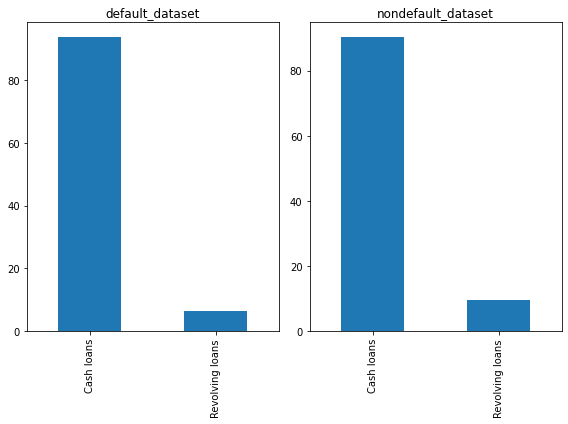

In [546]:
# NAME_CONTRACT_TYPE sgmented univariate analysis.
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
(default_dataset.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100).plot.bar()
plt.xticks(rotation=90)
plt.title("default_dataset")
plt.subplot(1,2,2)
(nondefault_dataset.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100).plot.bar()
plt.xticks(rotation=90)
plt.title("nondefault_dataset")
plt.tight_layout()
plt.show()

#### From above figure we can say that most of default and non-default cliants are from cash loans category.

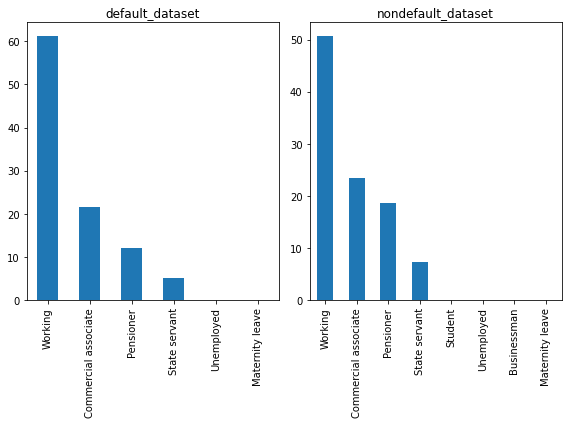

In [547]:
# NAME_INCOME_TYPE sgmented univariate analysis.
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
(default_dataset.NAME_INCOME_TYPE.value_counts(normalize=True)*100).plot.bar()
plt.xticks(rotation=90)
plt.title("default_dataset")
plt.subplot(1,2,2)
(nondefault_dataset.NAME_INCOME_TYPE.value_counts(normalize=True)*100).plot.bar()
plt.xticks(rotation=90)
plt.title("nondefault_dataset")
plt.tight_layout()
plt.show()

#### From above figure we can say that most of default and non-default cliants are from working category.

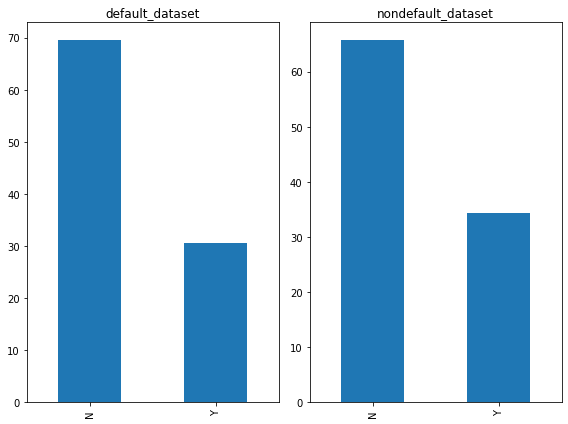

In [548]:
# FLAG_OWN_CAR sgmented univariate analysis.
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
(default_dataset.FLAG_OWN_CAR.value_counts(normalize=True)*100).plot.bar()
plt.xticks(rotation=90)
plt.title("default_dataset")
plt.subplot(1,2,2)
(nondefault_dataset.FLAG_OWN_CAR.value_counts(normalize=True)*100).plot.bar()
plt.xticks(rotation=90)
plt.title("nondefault_dataset")
plt.tight_layout()
plt.show()

#### From above figure we can say that most of default and non-default cliants are from non-car category.

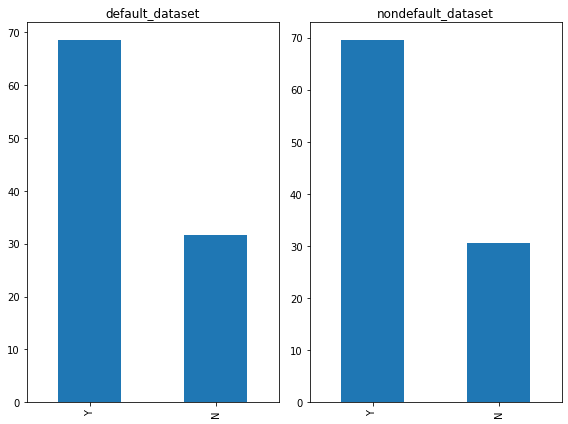

In [554]:
# FLAG_OWN_REALTY sgmented univariate analysis.
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
(default_dataset.FLAG_OWN_REALTY.value_counts(normalize=True)*100).plot.bar()
plt.xticks(rotation=90)
plt.title("default_dataset")
plt.subplot(1,2,2)
(nondefault_dataset.FLAG_OWN_REALTY.value_counts(normalize=True)*100).plot.bar()
plt.xticks(rotation=90)
plt.title("nondefault_dataset")
plt.tight_layout()
plt.show()

#### From above figure we can say that most of default and non-default cliants are from owned house category.

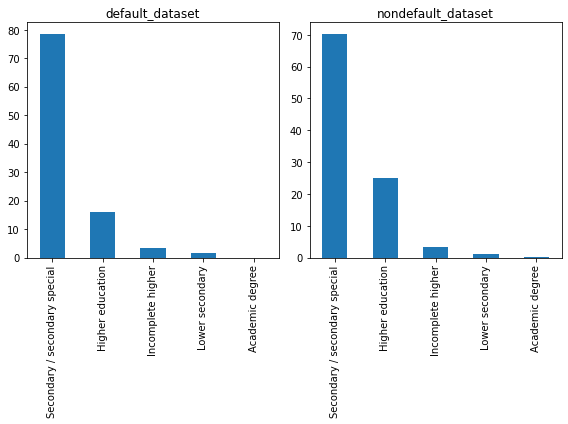

In [555]:
# NAME_EDUCATION_TYPE sgmented univariate analysis.
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
(default_dataset.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100).plot.bar()
plt.xticks(rotation=90)
plt.title("default_dataset")
plt.subplot(1,2,2)
(nondefault_dataset.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100).plot.bar()
plt.xticks(rotation=90)
plt.title("nondefault_dataset")
plt.tight_layout()
plt.show()

#### From above figure we can say that most of default and non-default cliants are from secondary education category.

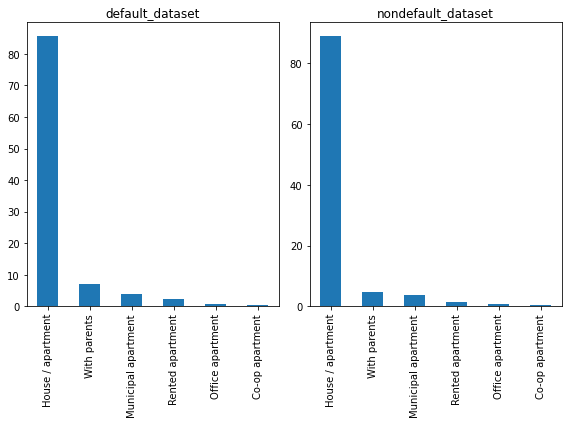

In [558]:
# NAME_HOUSING_TYPE sgmented univariate analysis.
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
(default_dataset.NAME_HOUSING_TYPE.value_counts(normalize=True)*100).plot.bar()
plt.xticks(rotation=90)
plt.title("default_dataset")
plt.subplot(1,2,2)
(nondefault_dataset.NAME_HOUSING_TYPE.value_counts(normalize=True)*100).plot.bar()
plt.xticks(rotation=90)
plt.title("nondefault_dataset")
plt.tight_layout()
plt.show()

#### From above figure we can say that most of default and non-default cliants are from who are living in it own apartment category

### 3. Bivariate Analysis

#### A) Numeric to numeric analysis

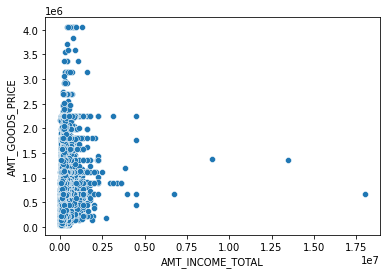

In [359]:
# First we will plot scatter-plot by using  income and goods price column.
sns.scatterplot(application_data1.AMT_INCOME_TOTAL , application_data1.AMT_GOODS_PRICE)
plt.show()

#### From above plot we can say that there is no strong linear relation between client's income and goods price. Goods price are changing without so much change in client income.

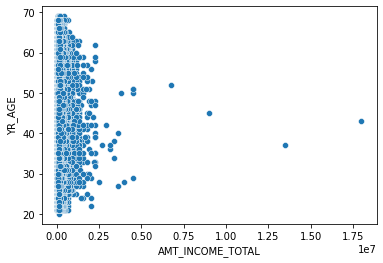

In [360]:
# Relation between income and age.
sns.scatterplot(application_data1.AMT_INCOME_TOTAL , application_data1.YR_AGE)
plt.show()

#### From above plot we can say that there is no strong linear relation between client's income and age. Age column changing without so much change in client income.

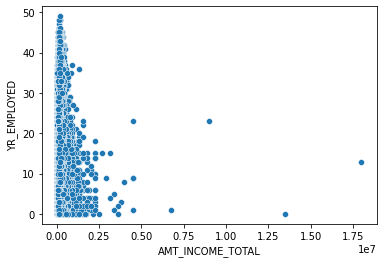

In [363]:
# Relation between income and emp[oyed year column.
sns.scatterplot(application_data1.AMT_INCOME_TOTAL , application_data1.YR_EMPLOYED)
plt.show()

#### From above plot we can say that there is no strong linear relation between client's income and current employment years.

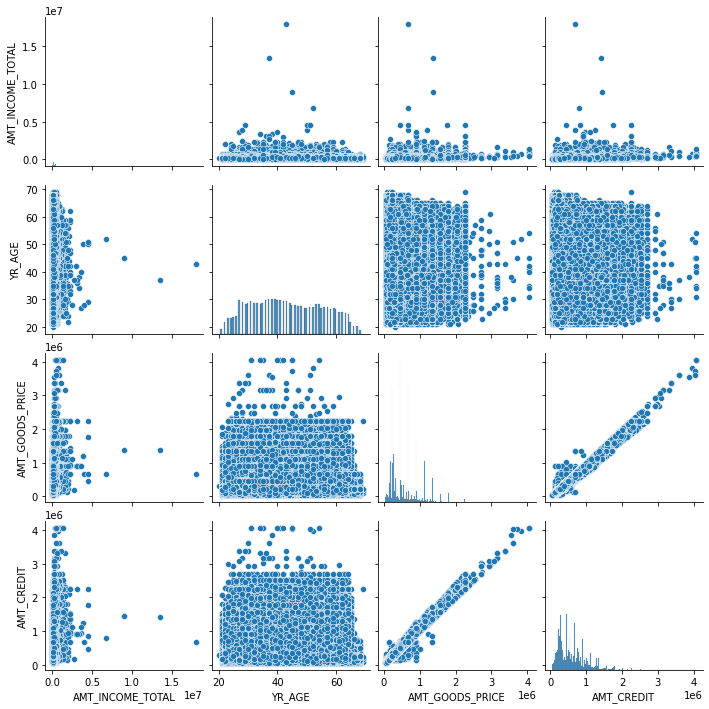

In [362]:
# Now we can plot pairplot of income, age, goods price and credit amount for better understanding.
sns.pairplot(application_data1, vars=["AMT_INCOME_TOTAL", "YR_AGE","AMT_GOODS_PRICE", "AMT_CREDIT",])
plt.show()

#### From above pairplot we can conclude that there is strong linear relation between goods price and credit amount. 

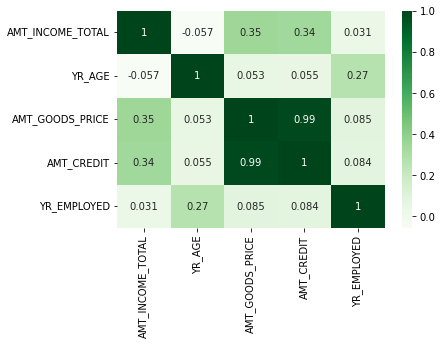

In [367]:
# By using correlation heatmap we can understand relation among all numerical variables
sns.heatmap(application_data1[["AMT_INCOME_TOTAL", "YR_AGE","AMT_GOODS_PRICE", "AMT_CREDIT", "YR_EMPLOYED"]].corr(), cmap="Greens", annot=True)
plt.show()

#### There is no strong correlation between any two numerical variables except goods price and amount credit.

#### B) Numerical to Categorical variable

#### Relation between Income and Target


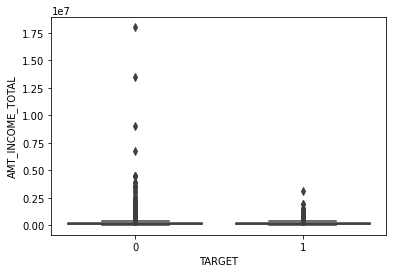

In [368]:
# We can use box plot to find relation between them
sns.boxplot(application_data1.TARGET, application_data1.AMT_INCOME_TOTAL)
plt.show()

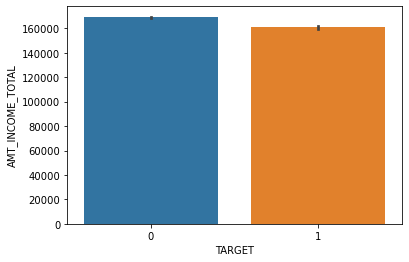

In [369]:
# We can also use bar plot to find relation between them
sns.barplot(application_data1.TARGET, application_data1.AMT_INCOME_TOTAL)
plt.show()

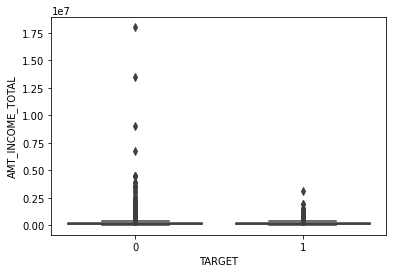

In [882]:
# We can also use box plot to find relation between them
sns.boxplot(application_data1.TARGET, application_data1.AMT_INCOME_TOTAL)
plt.show()

<AxesSubplot:xlabel='TARGET'>

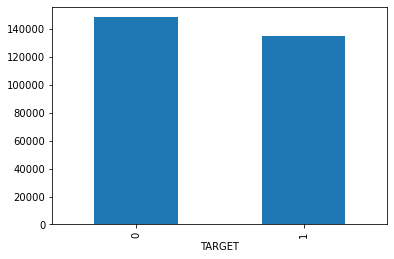

In [371]:
application_data1.groupby(["TARGET"])["AMT_INCOME_TOTAL"].median().plot.bar()

#### From above four graph we can say that there is chance to make payment default if client has lower income

#### Relation between Target and age of client

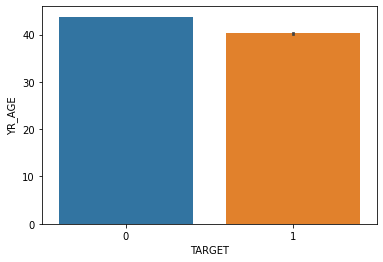

In [373]:
# We can also use bar plot to find relation between them
sns.barplot(application_data1.TARGET, application_data1.YR_AGE)
plt.show()

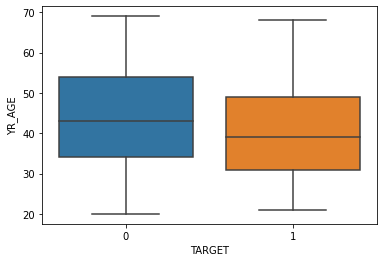

In [374]:
# We can also use box plot to find relation between them
sns.boxplot(application_data1.TARGET, application_data1.YR_AGE)
plt.show()

In [375]:
application_data1.groupby(["TARGET"])["YR_AGE"].mean()

TARGET
0    43.718886
1    40.279019
Name: YR_AGE, dtype: float64

#### from above information we can say that more than 75% of defaulting clients comes under 50 age.

#### Relation between Target and child count

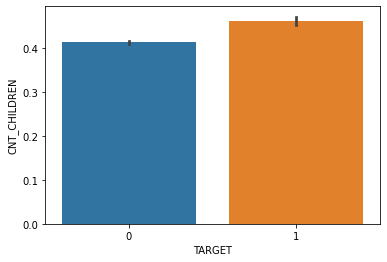

In [387]:
# plot bar plot for better understanding
sns.barplot(application_data1.TARGET, application_data1.CNT_CHILDREN)
plt.show()

#### We can say that there is chances of payment default if client has more children

#### Relation between Target and current employment period

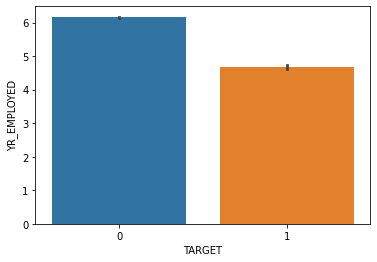

In [389]:
# we can plot barplot for this relation understanding 
sns.barplot(application_data1.TARGET, application_data1.YR_EMPLOYED)
plt.show()

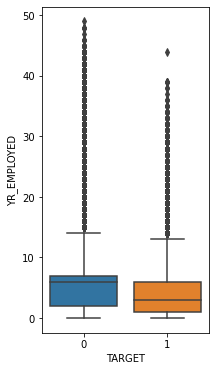

In [885]:
# we can plot boxplot for this relation understanding 
plt.figure(figsize=(3,6))
sns.boxplot(application_data1.TARGET, application_data1.YR_EMPLOYED)
plt.show()

<AxesSubplot:ylabel='TARGET'>

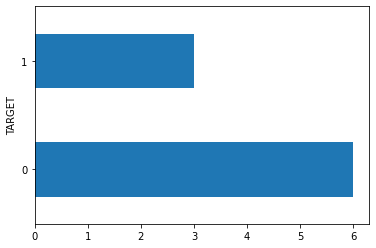

In [887]:
# graph of median
application_data1.groupby("TARGET")["YR_EMPLOYED"].median().plot.barh()

#### From Target and current employment period bar chart we can say that there are more chances to make payment default if client current emloyment period is less.

#### Relation between Target and registration change period

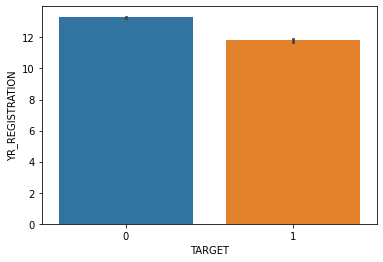

In [751]:
# we can plot barplot for this relation understanding 
sns.barplot(application_data1.TARGET, application_data1.YR_REGISTRATION)
plt.show()

#### Average of change in ragistration period before application of default clients is less than other. 

#### C) Categorical to categorical variable

#### Relation between Target and contract type

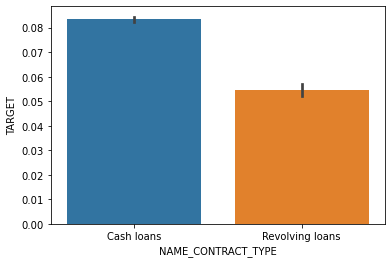

In [753]:
# ploting barplot of Target and contract type variable.
sns.barplot(application_data1.NAME_CONTRACT_TYPE , application_data1.TARGET)
plt.show()

#### In above bar plot cash loans shows high value. That means clients with cash loan type make more default than Revolving loans

#### Relation between Target and City Rating.

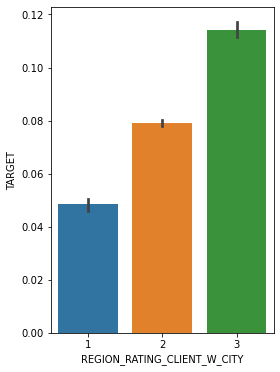

In [891]:
# ploting barplot of Target and City Rating type variable.
plt.figure(figsize=(4,6))
sns.barplot(application_data1.REGION_RATING_CLIENT_W_CITY , application_data1.TARGET)
plt.show()

####  clients with city-rating 3 make more default than othe two city ratings while paying installments.

#### Relation between Target and Income-type

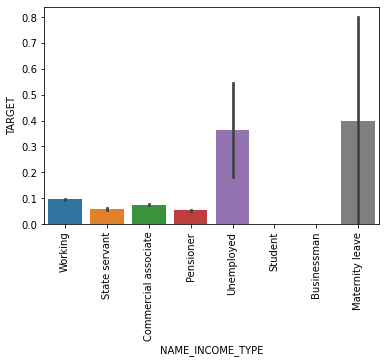

In [755]:
# ploting barplot of Target and income type variable.
sns.barplot(application_data1.NAME_INCOME_TYPE , application_data1.TARGET)
plt.xticks(rotation=90)
plt.show()

#### Unemployed and maternity leave type client make more default than other type of income.

#### Relation between Target and Education variable.

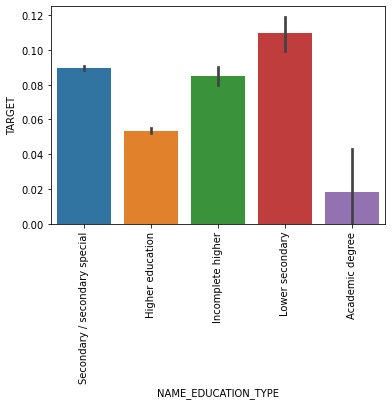

In [756]:
# ploting barplot of Target and Education type variable.
sns.barplot(application_data1.NAME_EDUCATION_TYPE , application_data1.TARGET)
plt.xticks(rotation=90)
plt.show()

#### Clients whose educational background is Lower Secondary make more default while paying installments.

#### Relation between Target and Marital status

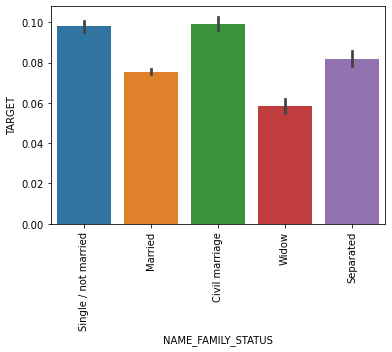

In [757]:
# ploting barplot of Target and marital status variable.
sns.barplot(application_data1.NAME_FAMILY_STATUS , application_data1.TARGET)
plt.xticks(rotation=90)
plt.show()

#### From above plot we can say that Single or Civil marriage type clients make more default than others.

#### Relation between Target and Accommodation type.

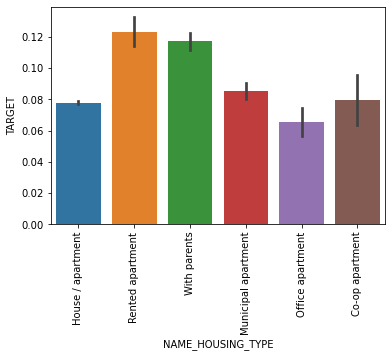

In [758]:
# ploting barplot of Target and accommodation type variable.
sns.barplot(application_data1.NAME_HOUSING_TYPE , application_data1.TARGET)
plt.xticks(rotation=90)
plt.show()

#### Client who lives in rental property make more default while paying installments.

#### Relation between Target and Occupation type.

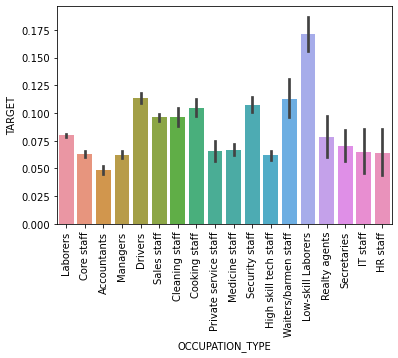

In [759]:
# ploting barplot of Target and Occupation type variable.
sns.barplot(application_data1.OCCUPATION_TYPE , application_data1.TARGET)
plt.xticks(rotation=90)
plt.show()

#### Low-skill laborers make max default while paying installments.

#### Relation between Target and age .

In [846]:
# Create age buckets with AGE_GROUP name
application_data1["AGE_GROUP"] = pd.cut(application_data1.YR_AGE, [0,30,40,50,60,100], labels=["<30","30-40","40-50","50-60","60+"])

<AxesSubplot:xlabel='AGE_GROUP', ylabel='TARGET'>

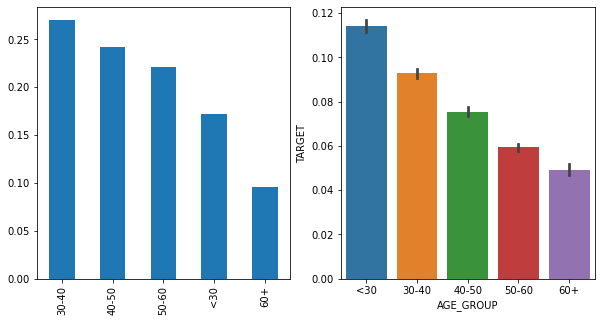

In [847]:
# ploting barplot of Target and age-group with normalize count.
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
application_data1.AGE_GROUP.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
sns.barplot(application_data1.AGE_GROUP , application_data1.TARGET)

#### In above bar chart(1,2,2) there is descending order. So we can say that lower the age higher the risk of default payments. 

In [849]:
# Create YR_ID_PUBLISH buckets with ID_GROUP name
application_data1["ID_GROUP"] = pd.cut(application_data1.YR_ID_PUBLISH, [-1,5,10,15,20], labels=["0-5","5-10","10-15","15-20"])

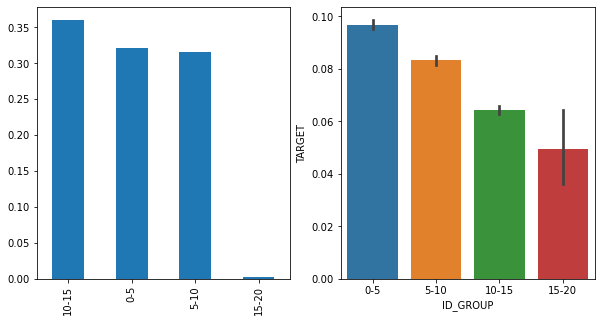

In [850]:
# ploting barplot of Target and ID_GROUP with normalize count.
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
application_data1.ID_GROUP.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
sns.barplot(application_data1.ID_GROUP , application_data1.TARGET)
plt.show()

#### From above two figure we can say that there are strong chances to make default in payment if client change his ID proof within five  years before application to loan .

### 4. Multivariate Analysis

<AxesSubplot:xlabel='OCCUPATION_TYPE', ylabel='NAME_EDUCATION_TYPE'>

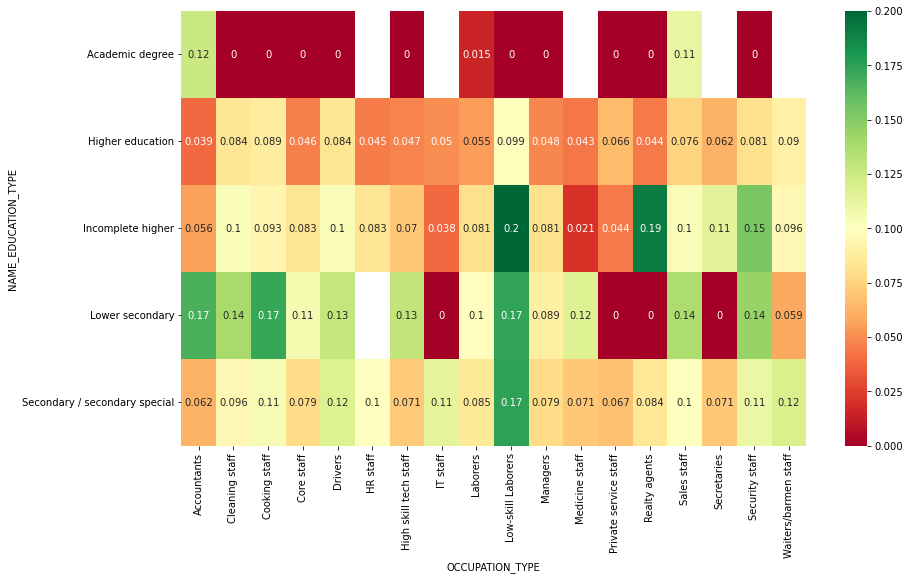

In [783]:
# create heat map of education vs occupation vs trget
plt.figure(figsize=(14,8))
data = pd.pivot_table(data= application_data1 , values="TARGET", index="NAME_EDUCATION_TYPE", columns="OCCUPATION_TYPE")
sns.heatmap(data , cmap="RdYlGn", annot=True)

#### From above heatmap we can say that client with "Lower-skill Laborers and Incomlpete higher" & "Realty agents and Incomlpete higher" category made more default while paying installments.

<AxesSubplot:xlabel='NAME_HOUSING_TYPE', ylabel='NAME_FAMILY_STATUS'>

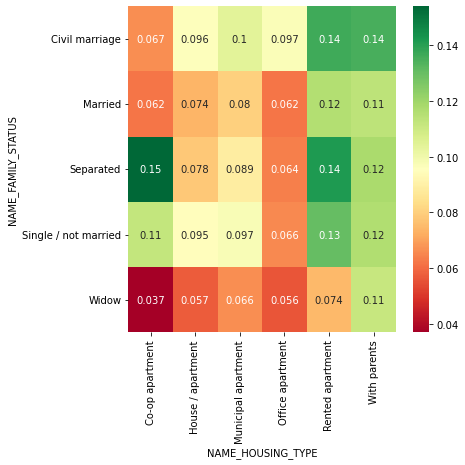

In [785]:
# create heat map of marital-status vs housing-type vs target
plt.figure(figsize=(6,6))
data = pd.pivot_table(data= application_data1 , values="TARGET", index="NAME_FAMILY_STATUS", columns="NAME_HOUSING_TYPE")
sns.heatmap(data , cmap="RdYlGn", annot=True)

#### From above heatmap we can say that client with "Co-op aparrment and Separated" , "Rented apartment and Separated " ,  "Rented apartment  and Civil marriage", "With parents and Civil marriage"  categories made more default while paying installments.¶

### Reading previous_data_file from .csv file

In [766]:
# previous_data = contains client's previous loan data information.
previous_data = pd.read_csv("C:\\Users\\sony\\Downloads\\previous_application.csv")
pd.set_option("display.max_columns", None)
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [767]:
# Printing shape of previous_data.
previous_data.shape

(1670214, 37)

In [768]:
# Finding missing values in previous_data.
for i in previous_data :
    if previous_data[i].isna().sum()>0:
        a = previous_data[i].isna().sum()
        print(i ," has",a, "na values")

AMT_ANNUITY  has 372235 na values
AMT_CREDIT  has 1 na values
AMT_DOWN_PAYMENT  has 895844 na values
AMT_GOODS_PRICE  has 385515 na values
RATE_DOWN_PAYMENT  has 895844 na values
RATE_INTEREST_PRIMARY  has 1664263 na values
RATE_INTEREST_PRIVILEGED  has 1664263 na values
NAME_TYPE_SUITE  has 820405 na values
CNT_PAYMENT  has 372230 na values
PRODUCT_COMBINATION  has 346 na values
DAYS_FIRST_DRAWING  has 673065 na values
DAYS_FIRST_DUE  has 673065 na values
DAYS_LAST_DUE_1ST_VERSION  has 673065 na values
DAYS_LAST_DUE  has 673065 na values
DAYS_TERMINATION  has 673065 na values
NFLAG_INSURED_ON_APPROVAL  has 673065 na values


### 1. Univariate Analysis

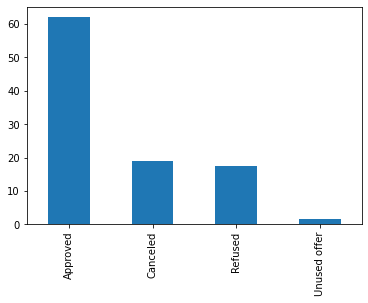

In [895]:
# Univariate analysis of NAME_CONTRACT_STATUS
(previous_data.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100).plot.bar()
plt.show()

#### From above barchart we can say that more than 60% of total applications were approved.

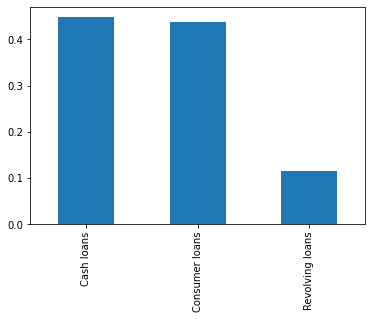

In [793]:
# Univariate analysis of NAME_CONTRACT_TYPE
previous_data.NAME_CONTRACT_TYPE.replace("XNA", "Cash loans", inplace=True)  # Replacing with mode
previous_data.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.bar()
plt.show()

#### More than 80% of previous loan were from cash and consumer category.

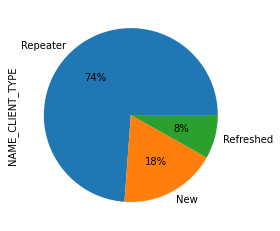

In [794]:
# Univariate analysis of NAME_CLIENT_TYPE
previous_data.NAME_CLIENT_TYPE.replace("XNA", "Repeater", inplace=True) # Replacing with mode
previous_data.NAME_CLIENT_TYPE.value_counts(normalize=True).plot.pie(autopct="%.0f%%")
plt.show()

#### More than 74% previou clients werw from Repeater category.

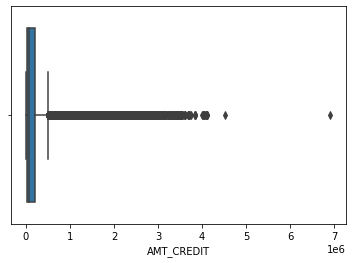

In [796]:
# Univariate analysis of  AMT_CREDIT
sns.boxplot(previous_data.AMT_CREDIT)
plt.show()

In [797]:
previous_data.AMT_CREDIT.median()

80541.0

In [798]:
previous_data.AMT_CREDIT.mean()

196114.02121797804

#### From above information we can say that average credit amount of clients is approx 80000. And mean showing higher value because of outliers.

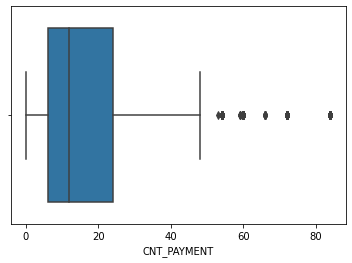

In [800]:
# Univariate analysis of  CNT_PAYMENT
sns.boxplot(previous_data.CNT_PAYMENT)
plt.show()

In [801]:
previous_data.CNT_PAYMENT.describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

#### Most of loans were approved for 12 months.

### 2. Bivariate Analysis

#### AMT_CREDIT vs NAME_CONTRACT_STATUS

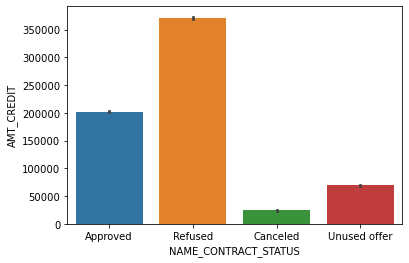

In [802]:
# Plot bar-chart
sns.barplot(previous_data.NAME_CONTRACT_STATUS, previous_data.AMT_CREDIT)
plt.show()

#### From aboe bar chart we can say that normaly bank refuses higher loan category clients.

#### CNT_PAYMENT vs NAME_CONTRACT_STATUS

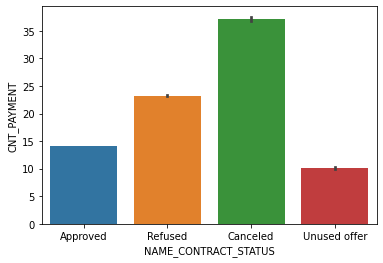

In [803]:
# Plot bar-chart
sns.barplot(previous_data.NAME_CONTRACT_STATUS, previous_data.CNT_PAYMENT)
plt.show()

#### From above bar chart we can say that normaly clints cancle loan contract with high tenure.

#### AMT_GOODS_PRICE vs NAME_CONTRACT_STATUS

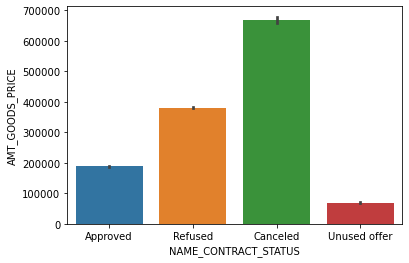

In [804]:
# Plot bar-chart
sns.barplot(previous_data.NAME_CONTRACT_STATUS, previous_data.AMT_GOODS_PRICE)
plt.show()

#### From above bar chart we can say that normaly clints cancle loan contract with higher goods price.

#### AMT_ANNUITY vs NAME_CONTRACT_STATUS

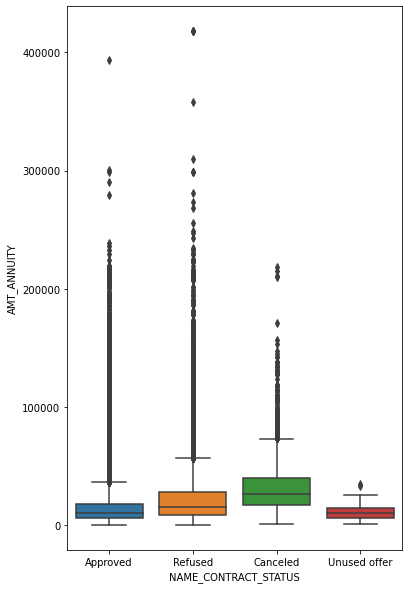

In [806]:
# Plot box-chart
plt.figure(figsize=(6,10))
sns.boxplot(previous_data.NAME_CONTRACT_STATUS, previous_data.AMT_ANNUITY)
plt.show()

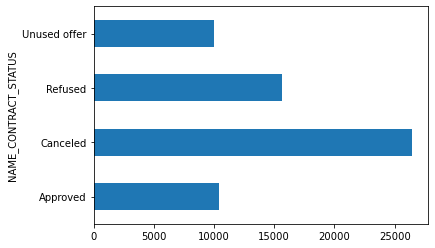

In [811]:
# Plot bar chart
previous_data.groupby("NAME_CONTRACT_STATUS")["AMT_ANNUITY"].median().plot.barh()
plt.show()

#### From above two chart we can say that mostly loans with higher annuity were canceled or refused by bank.

#### AMT_APPLICATION vs NAME_CONTRACT_STATUS

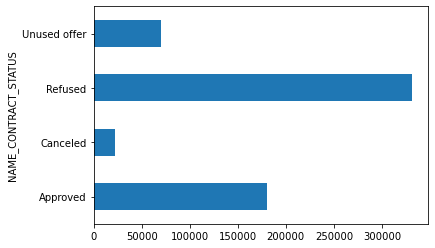

In [812]:
# Plot bar chart
previous_data.groupby("NAME_CONTRACT_STATUS")["AMT_APPLICATION"].mean().plot.barh()
plt.show()

#### From above plot we can say that mostly loans with higher application value were refused by bank.

### Merge applcation_data1 into previous_data 

In [814]:
# Changing SK_ID_CURR dtype from INT TO STR of previous data
previous_data.SK_ID_CURR = previous_data.SK_ID_CURR.astype(str)

In [851]:
# Merging of previous_data in to application_data1
# new_merge_data - creating new dataset with application_data1 and previous_data
new_merge_data = pd.merge(left=application_data1, right=previous_data, how="inner", left_on="SK_ID_CURR", right_on="SK_ID_CURR")
new_merge_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YR_AGE,YR_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,YR_REGISTRATION,YR_ID_PUBLISH,FLAG_DOCUMENT_4,FLAG_DOCUMENT_10,FLAG_DOCUMENT_12,ID_GROUP,AGE_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,1,Laborers,1,2,Business Entity Type 3,9,5,0,0,0,0-5,<30,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,45,3,Core staff,2,1,School,3,0,0,0,0,0-5,40-50,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,45,3,Core staff,2,1,School,3,0,0,0,0,0-5,40-50,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,45,3,Core staff,2,1,School,3,0,0,0,0,0-5,40-50,2396755,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,Y,1,0.100061,NaN,NaN,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,0,Laborers,1,2,Government,11,6,0,0,0,5-10,50-60,1564014,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5,Y,1,0.212008,NaN,NaN,XAP,Approved,-815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [852]:
# Print shape of new_merge_data
new_merge_data.shape

(1412226, 65)

### Bivariate Analysis

#### Relation between Target and Contract status.

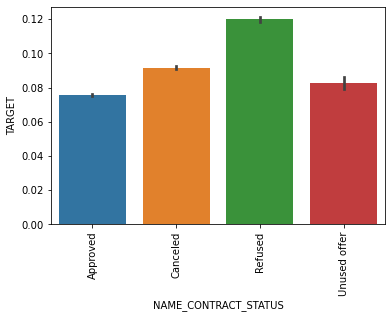

In [428]:
# ploting barplot of Target and contract status from previous application data.
sns.barplot( new_merge_data.NAME_CONTRACT_STATUS, new_merge_data.TARGET)
plt.xticks(rotation=90)
plt.show()

#### From above bar chart of previous contract status and target we can say that client whose application was refused earlier were make max default and those applications were approved previously make less default while paying installments.

#### Relation between Target and  AMT_CREDIT_y .

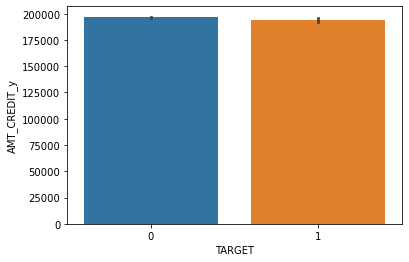

In [833]:
# plot bar chart 
sns.barplot(x = new_merge_data.TARGET , y = new_merge_data.AMT_CREDIT_y)
plt.show()

#### Relation between Target and AMT_ANNUITY_y 

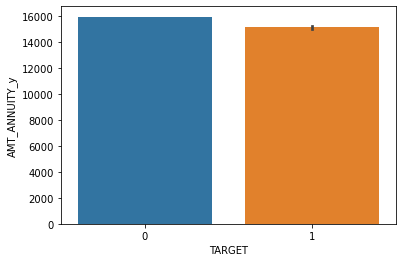

In [834]:
# plot bar chart 
sns.barplot(x = new_merge_data.TARGET , y = new_merge_data.AMT_ANNUITY_y)
plt.show()

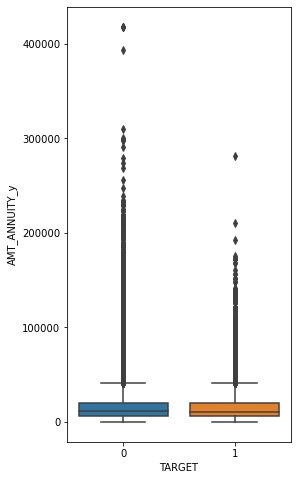

In [862]:
# plot bar chart
plt.figure(figsize=(4,8))
sns.boxplot(x = new_merge_data.TARGET , y = new_merge_data.AMT_ANNUITY_y)
plt.show()

#### Relation between Target and NAME_CONTRACT_TYPE_y

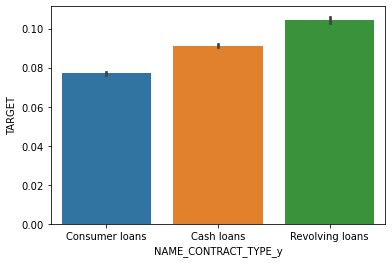

In [856]:
# plot bar chart 
sns.barplot(y = new_merge_data.TARGET , x = new_merge_data.NAME_CONTRACT_TYPE_y)
plt.show()

#### From above chart we can say that clients with revolving loan category made more default while paying installments.

#### Relation between Target and NAME_CLIENT_TYPE

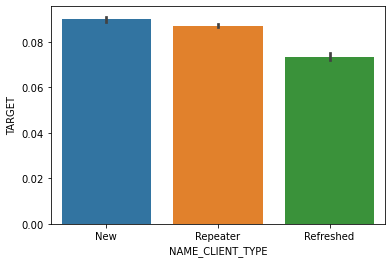

In [857]:
# plot bar chart 
sns.barplot(x = new_merge_data.NAME_CLIENT_TYPE, y = new_merge_data.TARGET  )
plt.show()

#### From above bar chart we can say that new clients make more default than repeater and refreshed clients

#### Relation between Target and NAME_TYPE_SUITE

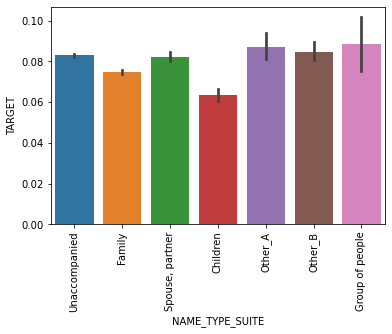

In [861]:
sns.barplot(x = new_merge_data.NAME_TYPE_SUITE, y = new_merge_data.TARGET  )
plt.xticks(rotation=90)
plt.show()

#### Relation between Target and PRODUCT_COMBINATION

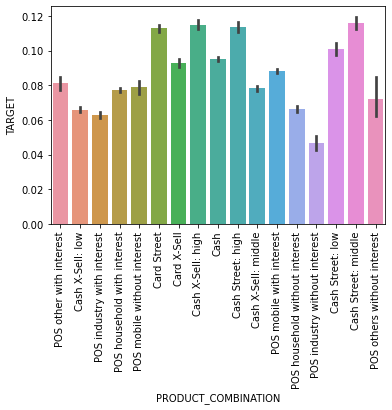

In [863]:
sns.barplot(x = new_merge_data.PRODUCT_COMBINATION, y = new_merge_data.TARGET  )
plt.xticks(rotation=90)
plt.show()

#### Relation between Target and NAME_YIELD_GROUP

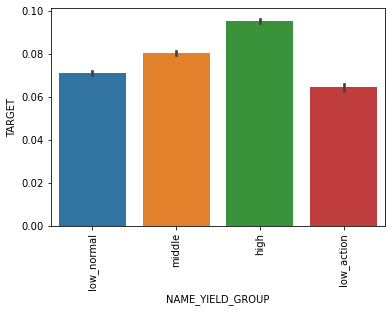

In [867]:
sns.barplot(x =new_merge_data.NAME_YIELD_GROUP[new_merge_data["NAME_YIELD_GROUP"]!="XNA"], y = new_merge_data.TARGET  )
plt.xticks(rotation=90)
plt.show()

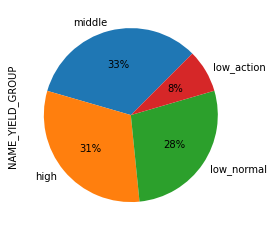

In [894]:
# ploting piechart of counts of interest rate
new_merge_data.NAME_YIELD_GROUP[new_merge_data["NAME_YIELD_GROUP"]!="XNA"].value_counts().plot.pie(autopct="%.0f%%",startangle=45)
plt.show()

#### From above bar plot we can say that clients with high interest rate make defaults more.

In [854]:
new_merge_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YR_AGE,YR_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,YR_REGISTRATION,YR_ID_PUBLISH,FLAG_DOCUMENT_4,FLAG_DOCUMENT_10,FLAG_DOCUMENT_12,ID_GROUP,AGE_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,1,Laborers,1,2,Business Entity Type 3,9,5,0,0,0,0-5,<30,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,45,3,Core staff,2,1,School,3,0,0,0,0,0-5,40-50,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,45,3,Core staff,2,1,School,3,0,0,0,0,0-5,40-50,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,45,3,Core staff,2,1,School,3,0,0,0,0,0-5,40-50,2396755,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,Y,1,0.100061,NaN,NaN,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,0,Laborers,1,2,Government,11,6,0,0,0,5-10,50-60,1564014,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5,Y,1,0.212008,NaN,NaN,XAP,Approved,-815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


### Multivariate Analysis

#### Family_status vs Contract-stasut vs Target

In [880]:
# Creating new data by using pivot_table
data = pd.pivot_table(data=new_merge_data, values= "TARGET", index= "NAME_FAMILY_STATUS", columns=new_merge_data.NAME_YIELD_GROUP[new_merge_data["NAME_YIELD_GROUP"]!="XNA"])

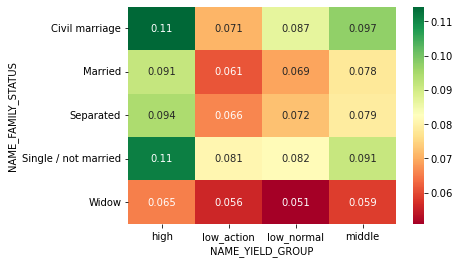

In [881]:
# Creating heatmap by using new data
sns.heatmap(data, cmap="RdYlGn", annot=True)
plt.show()

#### From above heatmap we can say that single and civil marriage family status with high interest rate makes more default.

#                                         THANK YOU